# CE for Cubic Metric and similar alternative metrics V3

In [2]:
import numpy as np
import scipy as sp
import sympy as sm
from numpy.fft import ifft,fft
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat # fyi
from numpy.random import rand, randn, randint  # fyi (or uniform, gaussian_normal)
from tqdm import tnrange, tqdm_notebook

plt.rc('text', usetex=True)

In [3]:
def generateSymbol(constName,constSize,size):
    """Generates data symbols from specified constellation which can be rectangular or not.
    not Normalized in anyway, usual values."""
    
    #assumed that constName is "QAM". Not yet written for other types
    
    if np.remainder(np.log2(constSize),2)!=0 & constSize>2:
        error('M must correspond to a rectangular constellation.')

    if constSize==2:
        tmpLevels=np.array([-1,1])
        constPoints=tmpLevels
    elif constSize==4:
        constPoints=np.exp(1j*np.pi/4*np.array([1,3,5,7]))
    else:
        tmpLevels=np.arange(0,np.sqrt(constSize))*2-(np.sqrt(constSize)-1)
        constPoints=np.tile(tmpLevels,[len(tmpLevels),1]) + np.transpose(np.tile(tmpLevels,[len(tmpLevels),1]))*complex(0,1)
    
    constPoints=np.reshape(constPoints,-1)
    
    symbols=constPoints[(randint(1,constSize+1,size))-1]
    symbols=np.reshape(symbols,size)
    
    return (symbols, constPoints)

In [64]:
symbols,constPoints=generateSymbol('QAM',16,[1,5])
print(symbols)

[[ 3.-3.j  1.-3.j  1.-1.j -3.-1.j -1.+1.j]]


# Optimum solution

In [ ]:
#exhaustive search

N=128
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

symbolsNum=5000

sampleSigns=np.zeros((N,sampleLength))

maxSize=2**16

signBlockNum=2**N/maxSize #2^(N-16) always divisible for N>=16

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    
    symbolsMat=np.tile(symbols,(1,maxSize))
    
    decidedSigns=np.ones(N)
    
    for cBlock in tqdm_notebook(range(signBlockNum), desc='over blocks', leave=False):
    
        signsDecimalBegin= cBlock*maxSize
        signsDecimalEnd= (cBlock+1)*maxSize
        
        
    
    
    
    
    estimatedCEminus=np.zeros((N,1))
    estimatedCEplus=np.zeros((N,1))
    
    #sampleSigns=randint(0,2,(N,sampleLength))*2-1
    #sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    #sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    #initialCM[cSym]= 1/sampleLength * np.sum(sampleCMs)



# Convergence of variances test

Note that what is evaluated and plotted below is the variances (expectation done) but for a given $\mathbf{c}$

In [43]:
#how variance terms look as a function of N at a specific time instance k
L=4
M=4



k=31;
a=np.array([])
b=np.array([])
c=np.array([])

NN=range(2**6,2**14+1,2**6)
for i,N in enumerate(NN):
    symbols,constPoints=generateSymbol('QAM',M,[1,N])
    #print(np.absolute(symbols))
    a=np.append(a,np.sum(1/N*np.real(symbols*np.exp(1j*2*np.pi/L/N*k*np.arange(N)))**2))
    c=np.append(c,np.sum(1/N*np.imag(symbols*np.exp(1j*2*np.pi/L/N*k*np.arange(N)))**2))
    b=np.append(b,np.sum(1/N*np.real(symbols*np.exp(1j*2*np.pi/L/N*k*np.arange(N)))
                    *np.imag(symbols*np.exp(1j*2*np.pi/L/N*k*np.arange(N)))))
    

plt.figure()
plt.plot(NN,a,label='$\mathrm{E}[(s_N^r(k))^2]$')
plt.plot(NN,b,'g',label='$\mathrm{E}[s_N^r(k)s_N^i(k)]$')
plt.plot(NN,c,'r',label='$\mathrm{E}[(s_N^i(k))^2]$')
plt.title('$a$ and $c$ going to 5 and $b$ to 0 for 16-QAM case as expected')
plt.xlabel('$N$')

plt.legend()
plt.show()

plt.figure()
plt.plot(NN,b,label='$\mathrm{E}[s_N^r(k)s_N^i(k)]$')
plt.legend()
plt.xlabel('$N$')
plt.show()

plt.figure()
plt.plot(NN,b/a,label='off-diag/real')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (0,32) (21,) 

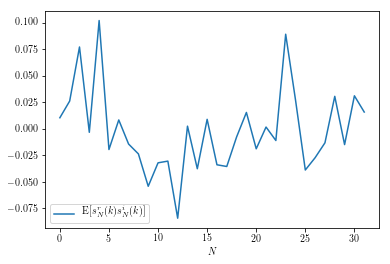

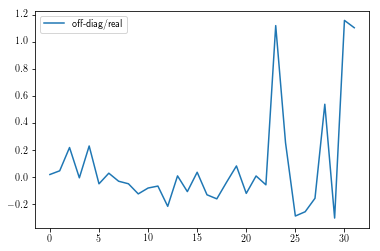

In [73]:
#how variance terms look as a function of sign index for a fixed k and N
L=4
M=4
N=32


k=31;

a=np.array([])
b=np.array([])
c=np.array([])

signRange=range(N)
for cSign in signRange:
    symbols,constPoints=generateSymbol('QAM',M,[1,N])
    #print(np.absolute(symbols))
    
    a=np.append(a,np.sum(1/N*np.real(symbols[0,cSign:]*np.exp(1j*2*np.pi/L/N*k*np.arange(cSign,N)))**2))
    c=np.append(c,np.sum(1/N*np.imag(symbols[0,cSign:]*np.exp(1j*2*np.pi/L/N*k*np.arange(cSign,N)))**2))
    b=np.append(b,np.sum(1/N*np.real(symbols[0,cSign:]*np.exp(1j*2*np.pi/L/N*k*np.arange(cSign,N)))
                    *np.imag(symbols[0,cSign:]*np.exp(1j*2*np.pi/L/N*k*np.arange(cSign,N)))))
    

plt.figure()
plt.plot(signRange,a,label='$\mathrm{E}[(s_N^r(k))^2]$')
plt.plot(signRange,b,'g',label='$\mathrm{E}[s_N^r(k)s_N^i(k)]$')
plt.plot(signRange,c,'r',label='$\mathrm{E}[(s_N^i(k))^2]$')
plt.title('$a$ and $c$ going to 5 and $b$ to 0 for 16-QAM case as expected')
plt.xlabel('$sign$')

plt.legend()
plt.show()

plt.figure()
plt.plot(signRange,b,label='$\mathrm{E}[s_N^r(k)s_N^i(k)]$')
plt.legend()
plt.xlabel('$sign$')
plt.show()

plt.figure()
plt.plot(signRange,b/a,label='off-diag/real')
plt.legend()
plt.show()

### Conclusion 

- Don't start with a low $N$ as you will see a nice converging curve, but fluctuations are not really converging if you zoom in.
- you'll see different behaviour for different realizations, run it a few times.

# Study on relation of CM and PAPR

we wanna see what CM values correspond to a tiny range of PAPR values. That is, a histogram for a specific range of PAPR. Or average of them. Or the other way around, for a specific CM.

In [102]:
#this is for a specific CM so to see what PAPRs correspond to the constant initial expectation of 6.
symbolsNum=100000
N=512
L=4
modulationOrder=16
uncodedCM=np.zeros(symbolsNum)
uncodedPAPR=np.zeros(symbolsNum)

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)



for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    #print(symbols.shape)
    #print(np.var(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N)))
    tmpSigOFDM=np.absolute(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N))
    uncodedCM[cSym]=1/L/N*np.sum(tmpSigOFDM**6)/Pav**3
    uncodedPAPR[cSym]=np.max(tmpSigOFDM**2)/Pav
        

HBox(children=(IntProgress(value=0, description='over symbols', max=100000), HTML(value='')))

In [103]:
print('Mean value of the uncoded CM just in case:',np.mean(uncodedCM))

CMvalue=6
CMepsilon=0.001
tmpS=abs(uncodedCM-CMvalue)<CMepsilon
print(np.sum(tmpS))
print('mean of PAPRs',10*np.log10(np.mean(uncodedPAPR[tmpS])),
      'dB and linear:',np.mean(uncodedPAPR[tmpS]))
print('variance of PAPRs',10*np.log10(np.var(uncodedPAPR[tmpS])),
      'dB and linear:',np.var(uncodedPAPR[tmpS]))
plt.figure()
plt.hist(10*np.log10(uncodedPAPR[tmpS]),50)
plt.show()
print('min PAPR dB=', 10*np.log10(np.min(uncodedPAPR[tmpS])), 'max=',10*np.log10(np.max(uncodedPAPR[tmpS])))

Mean value of the uncoded CM just in case: 5.985419624580783
115
mean of PAPRs 8.910468448415617 dB and linear: 7.781204778825708
variance of PAPRs -0.4382483497715827 dB and linear: 0.904014018317933


min PAPR dB= 7.675758883170959 max= 10.132572414263896


64: $\epsilon$=0.001 , 100000, 44 cases, 6.1 - 8.45 dB

128: $\epsilon$=0.001 , 100000, 56 cases, 6.9 - 9.73 dB, mean 8

256: $\epsilon$=0.001 , 100000, 115 cases, 7.7 - 10.1 dB, mean 8.9

# LargestValues low complexity method

## number of samples - threshold

We are interested in finding the threshold $\gamma(N,j)$ above which there is a certain average number of samples $M$. We will assume that the system is ready for the dynamic range of PAPR for a given $N$. Then at iteration $j$, we have the mean $\frac{1}{\sqrt{N}}\sum_{k=0}^{j}x^\ast_k c_k e^{j2pi/(LN) kn}$, which is oversampled OFDM for $j+1$ subcarriers but scaled with $\frac{1}{\sqrt{N}}$ instead of $\frac{1}{\sqrt{j+1}}$. But anyways, we will construct the signal exactly in the same fashion. $L=4$ will keep the overall oversampling factor safely more than enough.

In [80]:
#samples - threshold
symbolsNum=10000
N=128
L=4
modulationOrder=16

uncodedPAPR=np.zeros(symbolsNum)

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

uncodedPAPR=np.zeros((int(N/2),symbolsNum))


J=range(int(N/2)-1,N)
for cJ in tqdm_notebook(range(len(J)), desc='over j'):
    for cSym in range(symbolsNum):#tqdm_notebook(range(symbolsNum), desc='over symbols'):

        symbols,constPoints=generateSymbol('QAM',modulationOrder,(J[cJ]+1,1))
        tmpSigOFDM=np.absolute(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N))

        uncodedPAPR[cJ,cSym]=np.max(tmpSigOFDM**2)/Pav


HBox(children=(IntProgress(value=0, description='over j', max=65), HTML(value='')))

KeyboardInterrupt: 

# Implementation of CE method 

## Simulation parameters

In [9]:
N=64
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

sampleSigns=np.ones((N, sampleLength))

## Detailed inspection of dist. and positive definitness

In [10]:
#for a single sign, generously large sample length for the following blocks
L=4
sampleLength=10000;
signsToCheck=range(50,51) #takes random signs if starts at >1

#COMMENT LINES MARKED with ** TO STUDY ONE REALIZATION
symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1)) #**
symbolsMat=np.tile(symbols,(1,sampleLength))

decidedSigns=np.ones((N,1)) #**
decidedSigns[:signsToCheck[0]]=randint(0,2,(signsToCheck[0],1))*2-1 #**

estimatedCEminus=np.zeros((N,1))
estimatedCEplus=np.zeros((N,1))

sampleSigns=np.ones((N, sampleLength))

for cSign in signsToCheck:
    sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
    sampleSigns[cSign,:]=1
    sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

    sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    estimatedCEplus[cSign]= 1/sampleLength * np.sum(sampleCMs)

    sampleSigns[cSign,:]=-1
    sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
    sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignalsM)**6,0)
    estimatedCEminus[cSign]= 1/sampleLength * np.sum(sampleCMs)

    if estimatedCEminus[cSign] < estimatedCEplus[cSign]:
        decidedSigns[cSign]=-1
    
print(cSign)

50


### Covariance matrix and mean, calc and est

Mean values for sample 200 :(estimated/expected) 1.8791826770657833 -3.4945495170353817 [1.87700888-3.49066374j]
Covariance A for sample 200 : (estimated/expected) 1.037829846198487 1.0376715271712014 0.00015257142856870556 %
Covariance B for sample 200 : (estimated/expected) 0.030301901727638234 0.04091695840028875 -0.25942927059249854 %
Covariance C for sample 200 : (estimated/expected) 0.733547179536833 0.7435784728287986 -0.013490564423958544 %


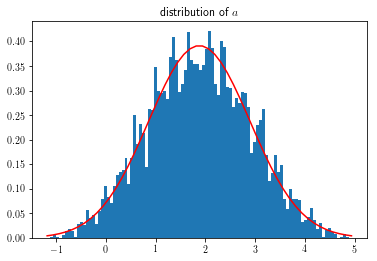

Number of off-diags(evaluated) less(absolute) than 1e-05 = 0
miniumum absolute off-diag= 0.00046615196537621445


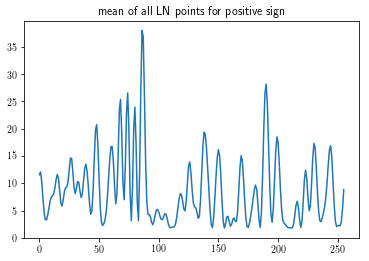

In [12]:
#this should show us that our calculations for the basic a,b and c give us the true values
#and no mistake is done.

DFTmtx=np.conjugate(sp.linalg.dft(N*L)[:,:N])/np.sqrt(N) #ifft has /L/N in it
cMtx=DFTmtx*np.tile(symbols.T,(L*N,1))

tmpSigns=decidedSigns[:cSign+1] #take one more only for for the size
tmpSigns[-1]=1 #we're testing it now for PLUS case
meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)

covVectorA=np.sum(cMtx[:,cSign+1:].real**2,axis=1)
covVectorB=np.sum((cMtx[:,cSign+1:].real * cMtx[:,cSign+1:].imag),axis=1)
covVectorC=np.sum(cMtx[:,cSign+1:].imag**2,axis=1)

for cSample in range(200,201):
    tmpSigR=sampleSignals[cSample,:].real
    tmpSigI=sampleSignals[cSample,:].imag
    estMeanR=np.mean(tmpSigR)
    estVarR=np.var(tmpSigR)
    estMeanI=np.mean(tmpSigI)
    estVarI=np.var(tmpSigI)
    estCovB=np.mean((tmpSigR-estMeanR)*(tmpSigI-estMeanI))
    estCovA=np.var(tmpSigR)
    estCovC=np.var(tmpSigI)
    
    n=np.linspace(estMeanR-3*np.sqrt(estVarR),
                  estMeanR+3*np.sqrt(estVarR),50)
    plt.figure()
    plt.hist(tmpSigR,100,density=True)
    plt.plot(n,1/np.sqrt(2*np.pi*estVarR)*np.exp(-(n-estMeanR)**2/2/estVarR),'r',label='$\mu=$'+str(estMeanR))
    plt.title('distribution of $a$')
    
    print('Mean values for sample',cSample,':(estimated/expected)',estMeanR,estMeanI,meanVector[cSample])
    print('Covariance A for sample',cSample,
          ': (estimated/expected)',estCovA,covVectorA[cSample],
          (estCovA-covVectorA[cSample])/covVectorA[cSample],'%')
    print('Covariance B for sample',cSample,
          ': (estimated/expected)',estCovB,covVectorB[cSample],
         (estCovB-covVectorB[cSample])/covVectorB[cSample],'%')
    print('Covariance C for sample',cSample,
          ': (estimated/expected)',estCovC,covVectorC[cSample],
         (estCovC-covVectorC[cSample])/covVectorC[cSample],'%')
    
    plt.figure()
    plt.plot(covVectorB/covVectorA)
    plt.title('ratio of off-diag to diag for all time samples')
    plt.show()
    
    offDiagEps=1e-5
    print('Number of off-diags(evaluated) less(absolute) than', offDiagEps, '=',np.sum(np.absolute(covVectorB)<offDiagEps))
    print('miniumum absolute off-diag=',np.min(np.absolute(covVectorB)))
    
    tmpSmallB=covVectorB[np.absolute(covVectorB)<offDiagEps]
    tmpAforSmallB=covVectorA[np.absolute(covVectorB)<offDiagEps]
    tmpCforSmallB=covVectorC[np.absolute(covVectorB)<offDiagEps]
    plt.figure()
    plt.plot(tmpSmallB,label='b')
    plt.plot(tmpCforSmallB-tmpAforSmallB,'r.',label='c-a')
    #plt.plot(np.absolute(tmpCforSmallB-tmpAforSmallB)/np.absolute(tmpSmallB),'g.',label='ratio')
    plt.legend()
    plt.title('Relevant for Report 12')
    plt.show()
    
    
     

conclusions

- I'm not confident what these a,b and c values they are
- But anyways, saying that thet are off only by scalar factors of iDFT, then notice that the off-diagonal is NOT that small compared to the diagonal terms. See the converges of variances section of the notebook. There it seems small (zero iteration)


### Inspection for method of sepapartion of large values 

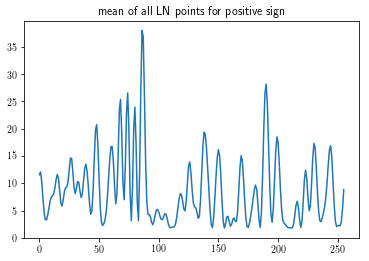

-2.344669896029105


In [23]:
meanVector=np.mean(np.absolute(sampleSignals)**2,axis=1)
plt.figure()
plt.plot(meanVector)
plt.title('mean of all LN points for positive sign')
plt.show()

numSamples=40
tmpSortedPlusIndices=np.argsort(np.absolute(meanVector))[-numSamples:]
mPartial=np.absolute(meanVector[tmpSortedPlusIndices])**2
mAll=np.absolute(meanVector)**2
Mpartial=(mPartial**3 + 18*mPartial**2 + 72*mPartial + 48)
Mall=((mAll**3 + 18*mAll**2 + 72*mAll + 48))

print((np.sum(Mpartial)-np.sum(Mall))/np.sum(Mall)*100)


### Derived CM

In [24]:
def calcCM(N,L,symbols,Pav,tmpSigns, newSign,calcMode):
    tmpSigns=np.append(tmpSigns,newSign)
    cSign=tmpSigns.size-1
    
    DFTmtx=np.conjugate(sp.linalg.dft(N*L)[:,:N])/np.sqrt(N) #ifft has /L/N in it
    
    #we have definite singularity at k=0 and LN/2. For now just remove them. 
    DFTmtx=np.delete(DFTmtx,0,0)
    DFTmtx=np.delete(DFTmtx,N*L/2-1,0) #-1 because already one row is deleted :D
    cMtx=DFTmtx*np.tile(symbols.T,(L*N-2,1))

   
    meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
    

    if calcMode=='correlated':
        covVectorA=np.sum(cMtx[:,cSign+1:].real**2,axis=1)
        covVectorB=np.sum((cMtx[:,cSign+1:].real * cMtx[:,cSign+1:].imag),axis=1)
        covVectorC=np.sum(cMtx[:,cSign+1:].imag**2,axis=1)

        #only double-checking formulas, comparison of derivation of eigenvalues and vectors and the evaluated ones
        D=np.sqrt((covVectorC-covVectorA)**2+4*covVectorB**2)
        eigenValues1=(covVectorA+covVectorC+D)/2
        eigenValues2=(covVectorA+covVectorC-D)/2

        if np.any(eigenValues1==0):
            print('zero lambda1 encountered at',np.nonzero(eigenValues1==0)[0])
        if np.any(eigenValues2==0):
            print('zero lambda2 encountered at',np.nonzero(eigenValues2==0)[0])


        xNorm=(covVectorB**2+(eigenValues1-covVectorA)**2)**(-0.5)
        X11=covVectorB*xNorm
        X22=covVectorB*xNorm
        X12=(eigenValues2-covVectorC)*xNorm
        X21=(eigenValues1-covVectorA)*xNorm



        EB1=(eigenValues1**(-0.5)*X11*meanVector.real+
             eigenValues1**(-0.5)*X21*meanVector.imag)
        EB2=(eigenValues2**(-0.5)*X12*meanVector.real+
             eigenValues2**(-0.5)*X22*meanVector.imag)

        m1=EB1**2
        m2=EB2**2
        M1=1
        M11=m1+1
        M12=m1**2+6*m1+3
        M13=m1**3+15*m1**2+45*m1+15
        M2=1
        M21=m2+1
        M22=m2**2+6*m2+3
        M23=m2**3+15*m2**2+45*m2+15
        l1=eigenValues1
        l2=eigenValues2
        #check by 3-th derivative of f(l1*t)*g(l2*t) with respect to t at t=0
        #M=l1**3+M13*M2 +3*l1**2*l2*M12*M21 +3*l1*l2**2*M11*M22 +l2**3*M23*M1
        #from wolfram by 
        #3-th derivative of (e^(m1*l1*t/(1-2*l1*t))*(1-2*l1*t)^(-1/2))*(e^(m2*l2*t/(1-2*l2*t))*(1-2*l2*t)^(-1/2)) with respect to t at t=0
        Mn=(24*l1**3*m1 + 15*l1**3 + 3*l1*(4*l1**2*m1 + (l1*m1 + l2*m2)**2 + 4*l2**2*m2) +
            3*(l1*m1 + l2*m2)*(4*l1**2*m1 + 4*l2**2*m2) +
            3*l2*(4*l1**2*m1 + 3*l1**2 + 2*l1*(l1*m1 + l2*m2) + (l1*m1 + l2*m2)**2 + 4*l2**2*m2) 
            + 9*l1**2*(l1*m1 + l2*m2) + 9*l2**2*(l1*m1 + l1 + l2*m2) + (l1*m1 + l2*m2)**3 + 24*l2**3*m2 + 15*l2**3)
        #if np.absolute(np.sum(M-Mn))>1e-5:
        #    print('Ding!',Mn[:5],M[:5])
        
        evalCE=np.sum(Mn)/L/N
    elif calcMode=='uncorrelated':
        varFactor=(N-cSign)/N*Pav/2
        m=np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
        M=varFactor**3*(m**3 + 18*m**2 + 72*m + 48)
        evalCE=np.sum(M)/L/N
    else:
        print('Incorrect mode!')
        evalCE=-1
    
    return evalCE#, l1, l2, X11, X12, X21, X22, EB1, EB2,meanVector

### Sample use of calcCM to see mismatches 

In [10]:
#compare the calculated CM with the estimated one

print('For sign in', signsToCheck)

#(evalCEminus,eigenValues1, eigenValues2, X11, X12, X21, X22,EB1,EB2,meanVector)=calcCM(N,L,symbols,decidedSigns[:cSign],1)
#(evalCEplus,eigenValues1, eigenValues2, X11, X12, X21, X22,EB1,EB2,meanVector)=calcCM(N,L,symbols,decidedSigns[:cSign],-1)

(evalCEminus)=calcCM(N,L,symbols,Pav,decidedSigns[:cSign],1,'uncorrelated')
(evalCEplus)=calcCM(N,L,symbols,Pav,decidedSigns[:cSign],-1,'uncorrelated')

print('plus:',evalCEplus, estimatedCEplus[cSign],evalCEplus/ estimatedCEplus[cSign])
print('minus:',evalCEminus, estimatedCEminus[cSign],evalCEminus/ estimatedCEminus[cSign])

For sign in range(50, 51)
plus: 6371.525276824834 [6180.53707886] [1.03090155]
minus: 6140.522198006512 [6421.05006287] [0.95631122]


/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':


For $x_{0:j}$ fixed, we have $\mathrm{E}[|s(k)|^2]=\left|\frac{1}{N} \sum_{i=0}^{j} x_i^\ast c_i e^{(...)}\right|^2+\frac{1}{N} \sum_{i=j+1}^{N-1}|c_i|^2$

### test on $E[Q]$ v.s. $E[|s(k)|^2]$

In [ ]:
#the mean values comparison
m1=EB1**2
m2=EB2**2
EQ=eigenValues1*(1+m1)+eigenValues2*(1+m2)
Es=np.mean(np.absolute(sampleSignals)**2,axis=1)
#k=0, LN/2 removed from analysis. problem here in comparison

plt.figure()
plt.plot(EQ,label='$\mathrm{E}[Q]$')
plt.plot(Es,label='$\mathrm{E}[|s(k)|^2]$ by estimation')
plt.plot(np.absolute(meanVector)**2+1/N*np.sum(np.absolute(symbols[cSign+1:])**2),
         label='$\mathrm{E}[|s(k)|^2]$ analytically')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.absolute(EQ-Es))
plt.title('$|EQ-Es|$')
plt.show()


### Positive definitness

In [ ]:
#positive definiteness
print('for sign:', cSign)
plt.figure()
plt.plot(eigenValues1)
plt.plot(eigenValues2)
plt.title('$\lambda_{1,2}$ for all $k$ for sign')
plt.show()

#print(np.sum(np.absolute(eigenValues1)<0.2))
print('min eigvalues=',np.min(eigenValues1),np.min(eigenValues2))

### distribution test

In [ ]:
#distribution test
cSample=200
B1=(eigenValues1[cSample]**(-0.5)*X11[cSample]*sampleSignals[cSample,:].real +
         eigenValues1[cSample]**(-0.5)*X21[cSample]*sampleSignals[cSample,:].imag)
B2=(eigenValues2[cSample]**(-0.5)*X12[cSample]*sampleSignals[cSample,:].real +
         eigenValues2[cSample]**(-0.5)*X22[cSample]*sampleSignals[cSample,:].imag)
Q=eigenValues1[cSample]*B1**2+eigenValues2[cSample]*B2**2
print(Q.shape)
plt.figure()
plt.hist(Q,100)
plt.show()

plt.figure()
plt.hist(np.absolute(sampleSignals[cSample,:])**2,100)
plt.show()


plt.show()
plt.figure()
plt.hist(sampleSignals[cSample,:].real*sampleSignals[cSample,:].imag,100)
plt.show()


plt.figure()
plt.hist(B1*B2,100)
plt.show()



print('variance of A1*A2=',np.var(sampleSignals[cSample,:].real*sampleSignals[cSample,:].imag))
print('variance of B1*B2=',np.var(B1*B2))


print(np.mean(Q))
print(np.absolute(sampleSignals[cSample,:10])**2/Q[:10])



I get fewer points with more than 2 for error ratio if either sample length is high or sign index is high. and they happen when values are very small!

### example of the decomposition 

In [ ]:
#a quick exercise on decomposition with numbers
a=1
b=1
c=5
d=((a-c)**2+4*b**2)**(0.5)
l1=(a+c+d)/2
l2=(a+c-d)/2
l=np.matrix([[l1,0],[0,l2]])
x=np.matrix([[b,l2-c],[l1-a,b]])
z=x*x.T
print(1/z[0,0]*x*x.T)
v=(1/z[0,0]**(0.5)*x)*l*(1/z[0,0]**(0.5)*x.T)
print(v)

tmp=np.array([[a,b],[b,c]])
L=np.linalg.cholesky(tmp)
print(np.matrix(L)*np.matrix(L.T)) #you expect to get tmp back

R11=a**0.5
R12=b/R11
R22=(c-b/a)**0.5
R=np.matrix([[R11,0],[R12,R22]])
print(R.T*R)

Rinv=np.matrix([[a**(-0.5),0],[-b/a/(c-b/a)**0.5,1/(c-b/a)**0.5]])
print(R*Rinv)

## Test run to compare est and calc

In [ ]:
#test run
sampleLength=10000 #for estimation

symbolsNum=1
signTheoBegin=2
signEstiBegin=100
signEnd=N-1-1

reducedCMcalc=np.zeros((symbolsNum,1))
reducedCMest=np.zeros((symbolsNum,1))
initialCM=np.zeros((symbolsNum,1))

tmpSigns=[]

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbolsMat=np.tile(symbols,(1,sampleLength))
    
    decidedSignsByEst=np.ones((N,1))
    decidedSignsByCalc=np.ones((N,1))
    
    estimatedCEminus=np.zeros((N,1))
    estimatedCEplus=np.zeros((N,1))
    evalCEminus=np.zeros((N,1))
    evalCEplus=np.zeros((N,1))
    
    sampleSigns=randint(0,2,(N,sampleLength))*2-1
    sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    initialCM[cSym]= 1/sampleLength * np.sum(sampleCMs)

    
    mismatch=False
    for cSign in range(0,20):#tqdm_notebook(range(0,N),desc='over signs'):

        #by estimation
        sampleSigns[:cSign,:]=np.tile(decidedSignsByEst[:cSign],(1,sampleLength))
        sampleSigns[cSign,:]=1
        sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

        sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
        sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
        estimatedCEplus[cSign]= 1/sampleLength * np.sum(sampleCMs)

        sampleSigns[cSign,:]=-1
        sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
        sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
        sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignalsM)**6,0)
        estimatedCEminus[cSign]= 1/sampleLength * np.sum(sampleCMs)

        if -estimatedCEminus[cSign] + estimatedCEplus[cSign]>20:
            decidedSignsByEst[cSign]=-1

        evalCEplus[cSign]=calcCM(N,L,symbols,decidedSignsByCalc[:cSign],1)
        evalCEminus[cSign]=calcCM(N,L,symbols,decidedSignsByCalc[:cSign],-1)

        if evalCEminus[cSign]- evalCEplus[cSign]<-1:
            decidedSignsByCalc[cSign]=-1
            #print('minus-plus=',evalCEminus[cSign]- evalCEplus[cSign])

        #print('sign=',decidedSignsByCalc[cSign],'values=',evalCEplus[cSign],evalCEminus[cSign])
        

        if decidedSignsByCalc[cSign]!=decidedSignsByEst[cSign]:
            print('Decision mismatch for sign', cSign)
            print(evalCEminus[cSign], evalCEplus[cSign], estimatedCEminus[cSign] , estimatedCEplus[cSign])
            mismatch=True
            break
        
        
    #if not mismatch:
    #reducedCMcalc[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSignsByCalc,n=L*N,axis=0)*L*np.sqrt(N))**6)
    
    #reducedCMest[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSignsByCalc,n=L*N,axis=0)*L*np.sqrt(N))**6)


## test run by calc first and then est

- The cubic metric and the PAPR are invariant to a negation, i.e., $|s(n)|=|-s(n)|$. Which means negation of all symbols. So $-\mathbf{x}^\ast$ and $\mathbf{x}^\ast$ give the same result. Can we conclude that we can begin with $x_1^\ast=1$ and expect to get the same sequence of signs with a negation if we had started with $x_1^\ast=-1$? 

In [ ]:
#test run
sampleLength=1000 #for estimation

symbolsNum=100
signTheoBegin=2
signEstiBegin=128-12
signEnd=N-1-1

reducedCMcalc=np.zeros((symbolsNum,1))
reducedCMest=np.zeros((symbolsNum,1))
initialCM=np.zeros((symbolsNum,1))
uncodedCM=np.zeros((symbolsNum,1))

tmpSigns=[]

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbolsMat=np.tile(symbols,(1,sampleLength))
    
    decidedSignsByEst=np.ones((N,1))
    decidedSignsByCalc=np.ones((N,1))
    
    estimatedCEminus=np.zeros((N,1))
    estimatedCEplus=np.zeros((N,1))
    evalCEminus=np.zeros((N,1))
    evalCEplus=np.zeros((N,1))
    
    sampleSigns=randint(0,2,(N,sampleLength))*2-1
    sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    initialCM[cSym]= 1/sampleLength * np.sum(sampleCMs)
     
    uncodedCM[cSym]=1/L/N * np.sum(np.absolute(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N))**6,0)
    
    mismatch=False
    for cSign in range(0,N):#tqdm_notebook(range(0,N),desc='over signs'):

        #by estimation
        if cSign>=signEstiBegin:
            sampleSigns[:cSign,:]=np.tile(decidedSignsByEst[:cSign],(1,sampleLength))
            sampleSigns[cSign,:]=1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

            sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
            estimatedCEplus[cSign]= 1/sampleLength * np.sum(sampleCMs)

            sampleSigns[cSign,:]=-1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
            sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignalsM)**6,0)
            estimatedCEminus[cSign]= 1/sampleLength * np.sum(sampleCMs)

            if -estimatedCEminus[cSign] + estimatedCEplus[cSign]>20:
                decidedSignsByEst[cSign]=-1
        else:   
              
            evalCEplus[cSign]=calcCM(N,L,symbols,decidedSignsByCalc[:cSign],1)
            evalCEminus[cSign]=calcCM(N,L,symbols,decidedSignsByCalc[:cSign],-1)

            if evalCEminus[cSign]< evalCEplus[cSign]:
                decidedSignsByCalc[cSign]=-1
                #print('minus-plus=',evalCEminus[cSign]- evalCEplus[cSign])

        #print('sign=',decidedSignsByCalc[cSign],'values=',evalCEplus[cSign],evalCEminus[cSign])
        

        #if decidedSignsByCalc[cSign]!=decidedSignsByEst[cSign]:
        #    print('Decision mismatch for sign', cSign)
        #    print(evalCEminus[cSign], evalCEplus[cSign], estimatedCEminus[cSign] , estimatedCEplus[cSign])
        #    mismatch=True
        #    break
        
        
    #if not mismatch:
    reducedCMcalc[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSignsByCalc,n=L*N,axis=0)*L*np.sqrt(N))**6)
    
    reducedCMest[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSignsByCalc,n=L*N,axis=0)*L*np.sqrt(N))**6)


### Performance

In [ ]:
#perf
plt.figure()
plt.plot(uncodedCM,'g.')
plt.plot(initialCM,'r.')
plt.plot(reducedCMcalc,'.')
#plt.plot(initialCM-reducedCMcalc,'k.')
#plt.plot(reducedCMest,'*')
#plt.plot(initialCM-reducedCMest,'k*')

plt.show()
plt.figure()
plt.plot(reducedCMcalc/initialCM)
plt.show()

- It seems that we're getting 1/2 reduction on average!! is is a coincidence or should we expect such a thing?

In [ ]:
#perf
plt.figure()
tmpb=np.concatenate((estimatedCEminus,estimatedCEplus),axis=1)
print(tmpb.shape)
plt.plot(np.arange(1,N+1),
         estimatedCEminus,'r.')
plt.plot(np.arange(1,N+1),
         estimatedCEplus,'b.')

plt.plot(np.arange(1,N+1),
         np.min(tmpb,axis=1),'k.')

plt.show()

plt.figure()
tmpb=np.concatenate((evalCEminus,evalCEplus),axis=1)
print(tmpb.shape)
plt.plot(np.arange(1,N+1),
         evalCEminus,'r.')
plt.plot(np.arange(1,N+1),
         evalCEplus,'b.')

plt.plot(np.arange(1,N+1),
         np.min(tmpb,axis=1),'k.')

plt.show()

print(reducedCM[-1],estimatedCEminus[-1], estimatedCEplus[-1])

#print(np.max(np.absolute(sampleSignals-sampleSignalsM)))
#print(decidedSigns.T)

- observe effect on sampleLength on the decreasing trend. details might be hidden here :-?

## Optimized for speed (CM)

Note that division by Pav^3 is not included in the code but when plotting is done. As well as any other factor.

In [9]:
#needs generateSymbol, otherwise dependancy on previous cells
mySeed=1
np.random.seed(mySeed)

N=64
L=4
modulationOrder=16

calcMode='uncorrelated'
numSamples=30

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

sampleLength=100 #for estimation

symbolsNum=10000

signTheoBegin=32 #counting from 1
signEstiBegin=N
signEnd=N

reducedCM=np.zeros((symbolsNum,1))
reducedPAPR=np.zeros((symbolsNum,1))

initialCM=np.zeros((symbolsNum,1))

tmpSigns=[]

DFTmtx=np.conjugate(sp.linalg.dft(N*L)[:,:N])/np.sqrt(N) #ifft has /L/N in it

#we have definite singularity at k=0 and LN/2. For now just remove them. 
DFTmtx=np.delete(DFTmtx,0,0)
DFTmtx=np.delete(DFTmtx,N*L/2-1,0) #-1 because already one row is deleted :D

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbolsMat=np.tile(symbols,(1,sampleLength))
    
    decidedSigns=np.ones((N,1))
    
    estimatedCEminus=np.zeros((N,1))
    estimatedCEplus=np.zeros((N,1))
    evalCEminus=np.zeros((N,1))
    evalCEplus=np.zeros((N,1))
    
    sampleSigns=randint(0,2,(N,sampleLength))*2-1
    sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    initialCM[cSym]= 1/sampleLength * np.sum(sampleCMs)
    
    
    cMtx=DFTmtx*np.tile(symbols.T,(L*N-2,1))



    for cSign in range(signTheoBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):

        #by estimation
        if cSign>=signEstiBegin:
            sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
            sampleSigns[cSign,:]=1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

            sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
            estimatedCEplus[cSign]= 1/sampleLength * np.sum(sampleCMs)

            sampleSigns[cSign,:]=-1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
            sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignalsM)**6,0)
            estimatedCEminus[cSign]= 1/sampleLength * np.sum(sampleCMs)

            if -estimatedCEminus[cSign] + estimatedCEplus[cSign]>20:
                decidedSigns[cSign]=-1
        else:   
              
            if calcMode=='correlated':
                tmpSigns=np.append(decidedSigns[:cSign],1)
                meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                covVectorA=np.sum(cMtx[:,cSign+1:].real**2,axis=1)
                covVectorB=np.sum((cMtx[:,cSign+1:].real * cMtx[:,cSign+1:].imag),axis=1)
                covVectorC=np.sum(cMtx[:,cSign+1:].imag**2,axis=1)

                D=np.sqrt((covVectorC-covVectorA)**2+4*covVectorB**2)
                eigenValues1=(covVectorA+covVectorC+D)/2
                eigenValues2=(covVectorA+covVectorC-D)/2

                if np.any(eigenValues1==0):
                    print('zero lambda1 encountered at',np.nonzero(eigenValues1==0)[0])
                if np.any(eigenValues2==0):
                    print('zero lambda2 encountered at',np.nonzero(eigenValues2==0)[0])


                xNorm=(covVectorB**2+(eigenValues1-covVectorA)**2)**(-0.5)
                X11=covVectorB*xNorm
                X22=covVectorB*xNorm
                X12=(eigenValues2-covVectorC)*xNorm
                X21=(eigenValues1-covVectorA)*xNorm

                EB1=(eigenValues1**(-0.5)*X11*meanVector.real+
                     eigenValues1**(-0.5)*X21*meanVector.imag)
                EB2=(eigenValues2**(-0.5)*X12*meanVector.real+
                     eigenValues2**(-0.5)*X22*meanVector.imag)

                m1=EB1**2
                m2=EB2**2

                M1=1
                M11=m1+1
                M12=m1**2+6*m1+3
                M13=m1**3+15*m1**2+45*m1+15
                M2=1
                M21=m2+1
                M22=m2**2+6*m2+3
                M23=m2**3+15*m2**2+45*m2+15

                l1=eigenValues1
                l2=eigenValues2

                Mn=(24*l1**3*m1 + 15*l1**3 + 3*l1*(4*l1**2*m1 + (l1*m1 + l2*m2)**2 + 4*l2**2*m2) +
                    3*(l1*m1 + l2*m2)*(4*l1**2*m1 + 4*l2**2*m2) +
                    3*l2*(4*l1**2*m1 + 3*l1**2 + 2*l1*(l1*m1 + l2*m2) + (l1*m1 + l2*m2)**2 + 4*l2**2*m2) 
                    + 9*l1**2*(l1*m1 + l2*m2) + 9*l2**2*(l1*m1 + l1 + l2*m2) + (l1*m1 + l2*m2)**3 + 24*l2**3*m2 + 15*l2**3)

                evalCEplus[cSign]=np.sum(Mn)/L/N

                #minus sign
                tmpSigns=np.append(decidedSigns[:cSign],-1)

                meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)

                covVectorA=np.sum(cMtx[:,cSign+1:].real**2,axis=1)
                covVectorB=np.sum((cMtx[:,cSign+1:].real * cMtx[:,cSign+1:].imag),axis=1)
                covVectorC=np.sum(cMtx[:,cSign+1:].imag**2,axis=1)

                D=np.sqrt((covVectorC-covVectorA)**2+4*covVectorB**2)
                eigenValues1=(covVectorA+covVectorC+D)/2
                eigenValues2=(covVectorA+covVectorC-D)/2

                if np.any(eigenValues1==0):
                    print('zero lambda1 encountered at',np.nonzero(eigenValues1==0)[0])
                if np.any(eigenValues2==0):
                    print('zero lambda2 encountered at',np.nonzero(eigenValues2==0)[0])


                xNorm=(covVectorB**2+(eigenValues1-covVectorA)**2)**(-0.5)
                X11=covVectorB*xNorm
                X22=covVectorB*xNorm
                X12=(eigenValues2-covVectorC)*xNorm
                X21=(eigenValues1-covVectorA)*xNorm

                EB1=(eigenValues1**(-0.5)*X11*meanVector.real+
                     eigenValues1**(-0.5)*X21*meanVector.imag)
                EB2=(eigenValues2**(-0.5)*X12*meanVector.real+
                     eigenValues2**(-0.5)*X22*meanVector.imag)

                m1=EB1**2
                m2=EB2**2

                M1=1
                M11=m1+1
                M12=m1**2+6*m1+3
                M13=m1**3+15*m1**2+45*m1+15
                M2=1
                M21=m2+1
                M22=m2**2+6*m2+3
                M23=m2**3+15*m2**2+45*m2+15

                l1=eigenValues1
                l2=eigenValues2

                Mn=(24*l1**3*m1 + 15*l1**3 + 3*l1*(4*l1**2*m1 + (l1*m1 + l2*m2)**2 + 4*l2**2*m2) +
                    3*(l1*m1 + l2*m2)*(4*l1**2*m1 + 4*l2**2*m2) +
                    3*l2*(4*l1**2*m1 + 3*l1**2 + 2*l1*(l1*m1 + l2*m2) + (l1*m1 + l2*m2)**2 + 4*l2**2*m2) 
                    + 9*l1**2*(l1*m1 + l2*m2) + 9*l2**2*(l1*m1 + l1 + l2*m2) + (l1*m1 + l2*m2)**3 + 24*l2**3*m2 + 15*l2**3)

                evalCEminus[cSign]=np.sum(Mn)/L/N
            elif calcMode=='uncorrelated':
                #tmpSigns=np.append(decidedSigns[:cSign],1)
                #meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                
                tmpSigns=np.append(decidedSigns[:cSign],1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L
                
                #plus sign
                varFactor=(N-cSign)/N*Pav/2
                m=np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
                M=(m**3 + 18*m**2 + 72*m + 48)
                evalCEplus[cSign]=np.sum(M)/L/N
                
                #minus sign
                tmpSigns=np.append(decidedSigns[:cSign],-1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L
                
                #tmpSigns=np.append(decidedSigns[:cSign],-1)

                #meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                
                m=np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
                M=(m**3 + 18*m**2 + 72*m + 48)
                evalCEminus[cSign]=np.sum(M)/L/N
                
            elif calcMode=='largestValues':
                #refers to ...
                tmpSigns=np.append(decidedSigns[:cSign],1)
                meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                tmpSortedPlusIndices=np.argsort(np.absolute(meanVector))[-numSamples:]
                m=np.absolute(meanVector[tmpSortedPlusIndices])**2
                M=(m**3 + 18*m**2 + 72*m + 48)
                
                evalCEplus[cSign]=np.sum(M)
                
                tmpSigns=np.append(decidedSigns[:cSign],-1)
                meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                
                tmpSortedMinusIndices=np.argsort(np.absolute(meanVector))[-numSamples:]
                m=np.absolute(meanVector[tmpSortedMinusIndices])**2
                M=(m**3 + 18*m**2 + 72*m + 48)
                
                evalCEminus[cSign]=np.sum(M)
            elif calcMode=='byMeanOnly':
                #plus sign
                tmpSigns=np.append(decidedSigns[:cSign],1)
                meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                m=np.absolute(meanVector)**2
                evalCEplus[cSign]=np.sum(m)/L/N
                
                #minus sign
                tmpSigns=np.append(decidedSigns[:cSign],-1)

                meanVector=np.dot(cMtx[:,:cSign+1],tmpSigns)
                
                m=np.absolute(meanVector)**2 
                evalCEminus[cSign]=np.sum(m)/L/N
            elif calcMode=='maxOfMean':
                #this one makes a simple search using max of the mean as 
                #we try +1 and -1 at each iteration for the new sign
                #recall that mean is like a partially built OFDM symbol
                tmpSigns=np.append(decidedSigns[:cSign],1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L
                #plus sign
                m=np.absolute(meanVector)**2
                evalCEplus[cSign]=np.max(m)
                
                #minus sign
                tmpSigns=np.append(decidedSigns[:cSign],-1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L
                
                m=np.absolute(meanVector)**2 
                evalCEminus[cSign]=np.max(m)
            else:
                print('wrong mode!')
                break

            if evalCEminus[cSign]< evalCEplus[cSign]:
                decidedSigns[cSign]=-1

    reducedCM[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**6)
    reducedPAPR[cSym]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)/Pav
    

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

### uncoded CM and PAPR

In [10]:
#uncoded CM and PAPR
symbolsNum=10000
#N=2048*2
#L=4
#modulationOrder=16
uncodedCM=np.zeros(symbolsNum)
uncodedPAPR=np.zeros(symbolsNum)

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)



for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    #print(symbols.shape)
    #print(np.var(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N)))
    tmpSigOFDM=np.absolute(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N))
    uncodedCM[cSym]=1/L/N*np.sum(tmpSigOFDM**6)
    uncodedPAPR[cSym]=np.max(tmpSigOFDM**2)/Pav
    
    
    

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

### CM CCDFs

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


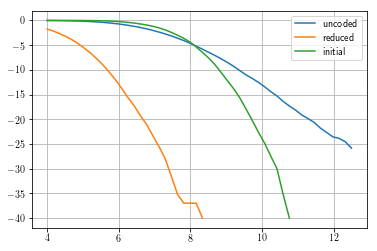

In [11]:
CMvaluesDB=np.linspace(4,12.5,50)

reducedCMccdf=np.zeros(len(CMvaluesDB))
uncodedCMccdf=np.zeros(len(CMvaluesDB))
initialCMccdf=np.zeros(len(CMvaluesDB))

#print(Pav)
for cTmp in range(len(CMvaluesDB)):
    reducedCMccdf[cTmp]=np.sum(reducedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    uncodedCMccdf[cTmp]=np.sum((uncodedCM/Pav**3)>(10**(CMvaluesDB[cTmp]/10)))
    initialCMccdf[cTmp]=np.sum((initialCM/Pav**3)>(10**(CMvaluesDB[cTmp]/10)))




plt.figure()

#sTmp=reducedCMccdf/len(reducedCM)<=0.001
#s1Tmp=np.nonzero(sTmp)[0][0]
#sTmp=initialCMccdf/len(initialCM)<=0.001
#s2Tmp=np.nonzero(sTmp)[0][0]
#sTmp=uncodedCMccdf/len(uncodedCM)<=0.001
#s3Tmp=np.nonzero(sTmp)[0][0]
#print('1e-3 point, reducedCM=',CMvaluesDB[s1Tmp])
#print('1e-3 point, initialCM=',CMvaluesDB[s2Tmp])
#print('1e-3 point, uncodedCM=',CMvaluesDB[s3Tmp])
    
    

plt.plot(CMvaluesDB,10*np.log10(uncodedCMccdf/len(uncodedCM)),label='uncoded')
plt.plot(CMvaluesDB,10*np.log10(reducedCMccdf/len(reducedCM)),label='reduced')
plt.plot(CMvaluesDB,10*np.log10(initialCMccdf/len(initialCM)),label='initial')
plt.legend()
plt.grid(which='both')
plt.show()







### PAPR CCDFs

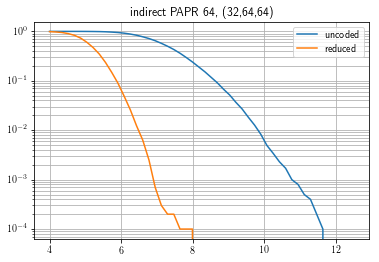

In [12]:

PAPRvaluesDB=np.linspace(4,12.5,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
uncodedPAPRccdf=np.zeros(len(PAPRvaluesDB))

#print(Pav)

for cTmp in range(len(PAPRvaluesDB)):
    reducedPAPRccdf[cTmp]=np.sum(reducedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    uncodedPAPRccdf[cTmp]=np.sum(uncodedPAPR>(10**(PAPRvaluesDB[cTmp]/10)))



plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D



#sTmp=reducedPAPRccdf/len(reducedPAPR)<=0.001
#s1Tmp=np.nonzero(sTmp)[0][0]
#sTmp=uncodedPAPRccdf/len(uncodedPAPR)<=0.001
#s3Tmp=np.nonzero(sTmp)[0][0]
#print('1e-3 point, reducedPAPR=',PAPRvaluesDB[s1Tmp])
#print('1e-3 point, uncodedPAPR=',PAPRvaluesDB[s3Tmp])
    
    

plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')
plt.semilogy(PAPRvaluesDB,(reducedPAPRccdf/len(reducedPAPR)),label='reduced')
plt.legend()
plt.title('indirect PAPR %d, (%d,%d,%d)'%(N,signTheoBegin,signEstiBegin,signEnd))
plt.grid(which='both')
plt.show()







### Saving data

In [13]:
#make sure you comment the save, just in case the cell is run accidentally
#np.savez('N4096_16QAM_50000_uncoded',reducedCM=uncodedCM, reducedCMccdf=uncodedCMccdf,
#        reducedPAPR=uncodedPAPR,reducedPAPRccdf=uncodedPAPRccdf)

#np.savez('N128_16QAM_50000_uncoded',reducedPAPR=uncodedPAPR,reducedPAPRccdf=uncodedPAPRccdf)

#np.savez('N%d_16QAM_%d_%d_%d_%d_Q%d_seed%d'%(N,len(reducedPAPR),signTheoBegin,signEstiBegin,signEnd,sampleLength,mySeed),
#         reducedCM=reducedCM,
#         initialCM=initialCM,initialCMccdf=initialCMccdf,reducedCMccdf=reducedCMccdf,
#         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf)#

np.savez('N%d_16QAM_%d_%d_%d_%d_Q%d'%(N,len(reducedPAPR),signTheoBegin,signEstiBegin,signEnd,sampleLength),
         reducedCM=reducedCM,
         initialCM=initialCM,initialCMccdf=initialCMccdf,reducedCMccdf=reducedCMccdf,
         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf)


### Seed Merger CM

In [9]:
seedNumbers=[0,3]
PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,12.5,50)

savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
savedCMccdf=np.zeros(len(CMvaluesDB))
savedInitialCMccdf=np.zeros(len(CMvaluesDB))

allReducedPAPR=np.array([])
allReducedCM=np.array([])
allInitialCM=np.array([])

    
for cSeed in seedNumbers:

    dataFile='N64_16QAM_2500_1_44_64_Q10000_seed%d.npz'%(cSeed)
    saved=np.load(dataFile)
    savedPAPR=saved['reducedPAPR'];
    savedCM=saved['reducedCM'];
    savedInitialCM=saved['initialCM'];
    allReducedPAPR=np.append(allReducedPAPR,savedPAPR)
    allReducedCM=np.append(allReducedCM,savedCM)
    allInitialCM=np.append(allInitialCM,savedInitialCM)
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=savedPAPRccdf[cTmp]+ np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
        savedCMccdf[cTmp]=savedCMccdf[cTmp]+ np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
        savedInitialCMccdf[cTmp]=savedInitialCMccdf[cTmp]+ np.sum(savedInitialCM/Pav**3>10**(CMvaluesDB[cTmp]/10))


np.savez('N64_16QAM_5000_1_44_64_Q10000',
     reducedPAPR=allReducedPAPR,reducedPAPRccdf=reducedPAPRccdf,
        reducedCM=allReducedCM,initialCM=allInitialCM)




## load and plot

-You see some discrepency between the constant upperbound of CM and mean value location of uncoded curves. It gets okay for larger $N$. Not accurate for low $N$

### different Ns

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log10


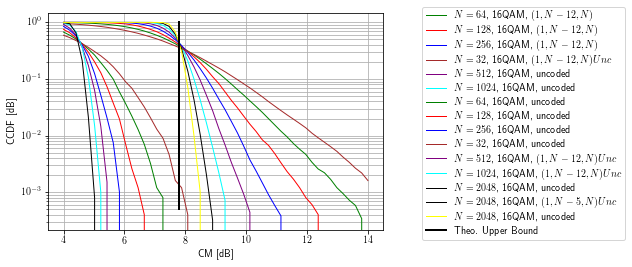

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log10


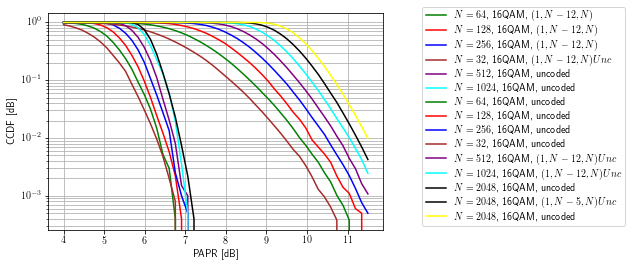

In [16]:
#different Ns
PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N





#different N's
if True:
    filesOrder=[1,0,5,7,8,10,2,3,4,6,9,11,12,13,14]
    dataFiles=['N128_16QAM_5000_1_116_128.npz',
               'N64_16QAM_5000_1_52_64.npz',
              'N64_16QAM_50000_uncoded.npz',
              'N128_16QAM_10000_uncoded.npz',
              'N256_16QAM_50000_uncoded.npz',
              'N256_16QAM_2000_1_244_256.npz',
               'N32_16QAM_50000_uncoded.npz',
               'N32_16QAM_5000_1_20_32_uncorrelated.npz',
               'N512_16QAM_50000_uncoded.npz',
               'N512_16QAM_2000_1_500_512_uncorrelated.npz',
              'N1024_16QAM_50000_uncoded.npz',
               'N1024_16QAM_2000_1_1012_1024_uncorrelated.npz',
              'N2048_16QAM_50000_uncoded.npz',
              'N2048_16QAM_5000_1_2043_2048_uncorrelated.npz',
              'N4096_16QAM_50000_uncoded.npz']

    curveLabels=['$N=128$, 16QAM, $(1,N-12,N)$',
                '$N=64$, 16QAM, $(1,N-12,N)$',
                '$N=64$, 16QAM, uncoded',
                '$N=128$, 16QAM, uncoded',
                '$N=256$, 16QAM, uncoded',
                '$N=256$, 16QAM, $(1,N-12,N)$',
                '$N=32$, 16QAM, uncoded',
                '$N=32$, 16QAM, $(1,N-12,N) Unc$',
                '$N=512$, 16QAM, uncoded',
                '$N=512$, 16QAM, $(1,N-12,N) Unc$',
                '$N=1024$, 16QAM, uncoded',
                '$N=1024$, 16QAM, $(1,N-12,N) Unc$',
                '$N=2048$, 16QAM, uncoded',
                '$N=2048$, 16QAM, $(1,N-5,N) Unc$',
                '$N=2048$, 16QAM, uncoded']


    
    filesStyle=[['red','None'],
                 ['green','None'],
                 ['green','None'],
                 ['red','None'],
                 ['blue','None'],
                 ['blue','None'],
                 ['brown','None'],
                 ['brown','None'],
                 ['purple','None'],
                 ['purple','None'],
               ['cyan','None'],
                 ['cyan','None'],
               ['black','None'],
                 ['black','None'],
                ['yellow','None']]


    

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=0
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1)

if plotUpperBound:
    plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Theo. Upper Bound',
                color='black',linewidth=2)
    
plt.grid(which='both')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM v1.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('PAPR v1.pdf',format='pdf')
plt.show()







### Curves for paper 1

$N=64$,  original: 5.898840
$N=64$: 2.798490
$N=64, N_f=N/2 $: 2.840538
$N=1024$,  original: 5.998065
$N=1024$: 2.793151
$N=1024, N_f=N/2$: 2.867024


/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10


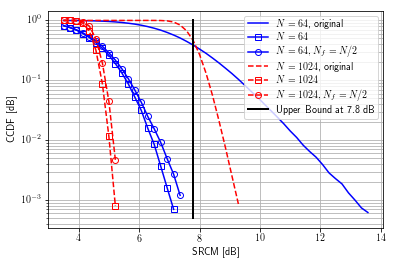

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log10


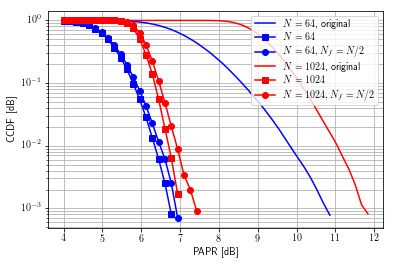

In [14]:
#temporary to produce curves for report
PAPRvaluesDB=np.linspace(4,12,50)
CMvaluesDB=np.linspace(3.5,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N





filesOrder=range(6)
dataFiles=['N64_16QAM_50000_uncoded.npz',
           'N64_16QAM_10000_1_64_64_Q100.npz',
           'N64_16QAM_10000_32_64_64_Q100.npz',
           'N1024_16QAM_50000_uncoded.npz',
           'N1024_16QAM_10000_1_1024_1024_Q100.npz',
           'N1024_16QAM_10000_512_1024_1024_Q100.npz']

curveLabels=['$N=64$,  original',
             '$N=64$' ,
             '$N=64, N_f=N/2 $' ,
             '$N=1024$,  original',
             '$N=1024$' ,
             '$N=1024, N_f=N/2$' ]


    
filesStyle=[['blue','None','-'],
             ['blue','s','-'],
             ['blue','o','-'],
            ['red','None','--'],
             ['red','s','--'],
             ['red','o','--']]


    

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-33]=np.inf
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1.5,
                fillstyle='none',linestyle=filesStyle[cFile][2])
    print('%s: %f'%(curveLabels[cFile],np.mean(savedCM/Pav**3)))


plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Upper Bound at 7.8 dB',
            color='black',linewidth=2)
    
plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('SRCM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CMreduction.pdf',format='pdf',bbox_inches='tight')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-33]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('indirectPAPRbyCM.pdf',format='pdf')
plt.show()







### Curves for paper 2

In [11]:
#temporary to produce curves for report
PAPRvaluesDB=np.linspace(4,12,50)
CMvaluesDB=np.linspace(3.5,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N



#Pav=10


dataFiles=['N64_16QAM_50000_uncoded.npz',
          'N64_16QAM_10000_1_64_64_Q100.npz',
          'SLM_N64_16QAM_10000_S100.npz',
          'N1024_16QAM_50000_uncoded.npz',
           'N1024_16QAM_10000_1_1024_1024_Q100.npz',
           'SLM_N1024_16QAM_10000_S100.npz']
filesOrder=range(len(dataFiles))


curveLabels=['$N=64$ original',
             '$N=64$ CE Method' ,
             '$N=64$ SLM',
            '$N=1024$ original',
             '$N=1024$ CE Method' ,
             '$N=1024$ SLM']


    
filesStyle=[['blue','None','-'],
             ['blue','s','-'],
             ['blue','o','-'],
            ['red','None','--'],
             ['red','s','--'],
             ['red','o','--']]


    


plt.figure()
#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-33]=np.inf
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1.5,
                fillstyle='none',linestyle=filesStyle[cFile][2])
    print('%s: %f'%(curveLabels[cFile],10*np.log10(np.mean(savedCM/Pav**3))))



plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('SRCM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CMreduction2.pdf',format='pdf',bbox_inches='tight')
plt.show()






$N=64$ original: 7.707666
$N=64$ CE Method: 4.469237
$N=64$ SLM: 5.337496
$N=1024$ original: 7.780112
$N=1024$ CE Method: 4.460944
$N=1024$ SLM: 7.009713


/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10


### 256

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


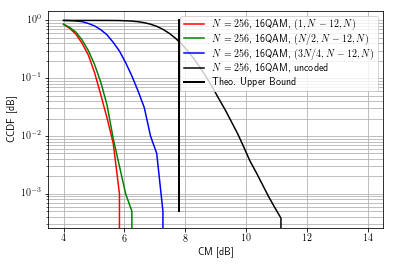

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log10


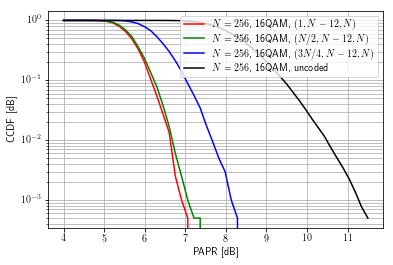

In [47]:
#256
PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N






#256 refined
if True:
    filesOrder=[0,1,2,3]
    dataFiles=['N256_16QAM_2000_1_244_256.npz',
               'N256_16QAM_2000_128_244_256.npz',
              'N256_16QAM_2000_192_244_256.npz',
              'N256_16QAM_50000_uncoded.npz']

    curveLabels=['$N=256$, 16QAM, $(1,N-12,N)$',
                '$N=256$, 16QAM, $(N/2,N-12,N)$',
                '$N=256$, 16QAM, $(3N/4,N-12,N)$',
                '$N=256$, 16QAM, uncoded']

    filesStyle=[['red','None'],
                 ['green','None'],
                 ['blue','None'],
                 ['black','None']]



plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=0
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

if plotUpperBound:
    plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Theo. Upper Bound',
                color='black',linewidth=2)
    
plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM v1.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('PAPR v1.pdf',format='pdf')
plt.show()







### 128

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10


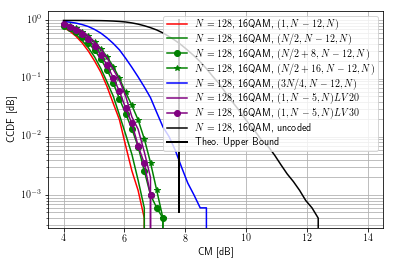

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log10


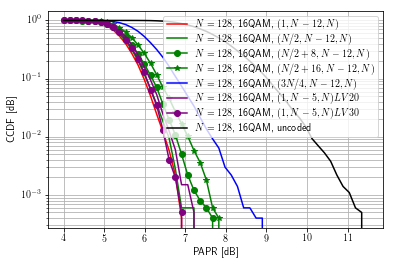

In [72]:
#128
PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N

#128 refined
if True:
    filesOrder=[0,1,2,3,4,5,6,7]
    dataFiles=['N128_16QAM_5000_1_116_128.npz',
               'N128_16QAM_5000_64_116_128.npz',
               'N128_16QAM_5000_72_116_128.npz',
               'N128_16QAM_5000_80_116_128.npz',
              'N128_16QAM_5000_96_116_128.npz',
               'N128_16QAM_2000_1_123_128_largestValues20.npz',
               'N128_16QAM_2000_1_123_128_largestValues30.npz',
              'N128_16QAM_10000_uncoded.npz']

    curveLabels=['$N=128$, 16QAM, $(1,N-12,N)$',
                '$N=128$, 16QAM, $(N/2,N-12,N)$',
                '$N=128$, 16QAM, $(N/2+8,N-12,N)$',
                '$N=128$, 16QAM, $(N/2+16,N-12,N)$',
                '$N=128$, 16QAM, $(3N/4,N-12,N)$',
                 '$N=128$, 16QAM, $(1,N-5,N) LV20$',
                 '$N=128$, 16QAM, $(1,N-5,N) LV30$',
                '$N=128$, 16QAM, uncoded']

    filesStyle=[['red','None'],
                 ['green','None'],
                 ['green','o'],
                 ['green','*'],
                 ['blue','None'],
                ['purple','None'],
                ['purple','o'],
                 ['black','None']]





plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=0
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

if plotUpperBound:
    plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Theo. Upper Bound',
                color='black',linewidth=2)
    
plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM v1.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('PAPR v1.pdf',format='pdf')
plt.show()







### 32

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10


/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


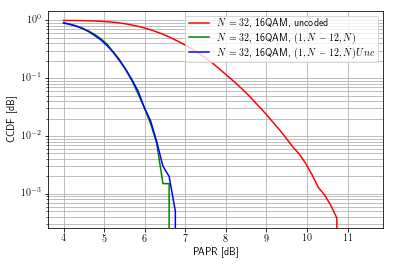

In [40]:
#32

PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N



if True:
    filesOrder=[0,1,2]
    dataFiles=['N32_16QAM_50000_uncoded.npz',
               'N32_16QAM_2000_1_20_32.npz',
               'N32_16QAM_2000_1_20_32_uncorrelated.npz']


    curveLabels=['$N=32$, 16QAM, uncoded',
                '$N=32$, 16QAM, $(1,N-12,N)$',
                '$N=32$, 16QAM, $(1,N-12,N) Unc$']

                

    filesStyle=[['red','None'],
                 ['green','None'],
                 ['blue','None']]


             

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=0
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

if plotUpperBound:
    plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Theo. Upper Bound',
                color='black',linewidth=2)
    
plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM v1.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('PAPR v1.pdf',format='pdf')
plt.show()







### 64

What's wrong with the meanonly one? didn't we have something like this before? it was working!

In [55]:
#64

PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N



#64
if True:
    filesOrder=[0,1,2,3,4,5,6,7]
    dataFiles=['N64_16QAM_50000_uncoded.npz',
               'N64_16QAM_5000_1_52_64.npz',
               'N64_16QAM_2000_1_52_64_uncorrelated.npz',
               'N64_16QAM_2000_1_52_64_largestValues50.npz',
               'N64_16QAM_2000_1_52_64_largestValues20.npz',
               'N64_16QAM_2000_1_52_64_byMeanOnly.npz',
               'N64_16QAM_2000_1_59_64_uncorrelated.npz',
              'N64_16QAM_2000_1_64_64_uncorrelated.npz']

    curveLabels=['$N=64$, 16QAM, uncoded',
                '$N=64$, 16QAM, $(1,N-12,N)$',
                '$N=64$, 16QAM, $(1,N-12,N) Unc$',
                '$N=64$, 16QAM, $(1,N-12,N) LV50$',
                 '$N=64$, 16QAM, $(1,N-12,N) LV20$',
                '$N=64$, 16QAM, $(1,N-12,N) ByMean$',
                '$N=64$, 16QAM, $(1,N-5,N) Unc$',
                '$N=64$, 16QAM, $(1,N,N) Unc$']
    
                

    filesStyle=[['red','None'],
                 ['green','None'],
                 ['blue','None'],
                 ['brown','None'],
                ['purple','None'],
                ['yellow','None'],
               ['blue','o'],
               ['blue','s']]




             

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=0
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

if plotUpperBound:
    plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Theo. Upper Bound',
                color='black',linewidth=2)
    
plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM v1.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('PAPR v1.pdf',format='pdf')
plt.show()







/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log10


###  64 for Q

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log10


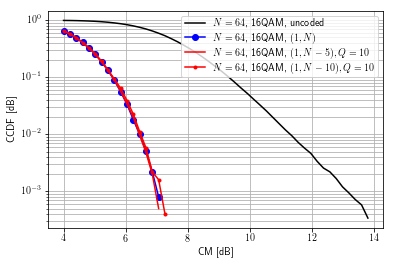

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in log10


In [10]:
#64

PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N



#64
if True:
    
    dataFiles=['N64_16QAM_50000_uncoded.npz',
              'N64_16QAM_10000_1_64_64_two.npz',
#              'N64_16QAM_10000_1_59_64_Q10.npz',
#              'N64_16QAM_10000_1_54_64_Q10.npz',
#              'N64_16QAM_10000_1_44_64_Q10.npz']
#              'N64_16QAM_10000_1_59_64_Q100.npz',
#              'N64_16QAM_10000_1_54_64_Q100.npz',
#              'N64_16QAM_10000_1_44_64_Q100.npz']
#              'N64_16QAM_10000_1_59_64_Q1000.npz',
#              'N64_16QAM_10000_1_54_64_Q1000.npz',
#              'N64_16QAM_10000_1_44_64_Q1000.npz',
              'N64_16QAM_10000_1_59_64_Q10000.npz',
              'N64_16QAM_5000_1_44_64_Q10000.npz']

    filesOrder=range(len(dataFiles))
    
    curveLabels=['$N=64$, 16QAM, uncoded',
                '$N=64$, 16QAM, $(1,N)$',
                '$N=64$, 16QAM, $(1,N-5), Q=10$',
                 '$N=64$, 16QAM, $(1,N-10), Q=10$',
                 '$N=64$, 16QAM, $(1,N-20), Q=10$',
                 '$N=64$, 16QAM, $(1,N-5), Q=100$',
                 '$N=64$, 16QAM, $(1,N-10), Q=100$',
                 '$N=64$, 16QAM, $(1,N-20), Q=100$',
                 '$N=64$, 16QAM, $(1,N-5), Q=1000$',
                 '$N=64$, 16QAM, $(1,N-10), Q=1000$',
                 '$N=64$, 16QAM, $(1,N-20), Q=1000$',
                ]
    
                

    filesStyle=[['black','None'],
                 ['blue','o'],
                 ['red','None'],
                ['red','.'],
                ['red','o'],
                 ['brown','None'],
                ['brown','.'],
                ['brown','o'],
                ['purple','None'],
                ['purple','.'],
                ['purple','o']]




             

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=np.inf
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

    
plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM for Q.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('indirect PAPR of CM for Q.pdf',format='pdf')
plt.show()







### maxOfMean

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10


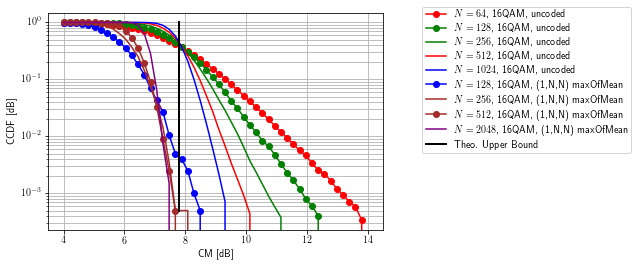

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log10


In [37]:
#max of mean for diff Ns
PAPRvaluesDB=np.linspace(4,11.5,50)
CMvaluesDB=np.linspace(4,14,50)

withTitle=False

plotUpperBound=True
upperBound=6 #for all N


if True:
    filesOrder=[0,1,2,3,4,5,6,7,8]
    dataFiles=['N64_16QAM_50000_uncoded.npz',
              'N128_16QAM_10000_uncoded.npz',
              'N256_16QAM_50000_uncoded.npz',
               'N512_16QAM_50000_uncoded.npz',
              'N1024_16QAM_50000_uncoded.npz',
              'N128_16QAM_2000_1_128_128_maxOfMean.npz',
              'N256_16QAM_2000_1_256_256_maxOfMean.npz',
              'N512_16QAM_2000_1_512_512_maxOfMean.npz',
              'N2048_16QAM_2000_1_2048_2048_maxOfMean.npz']

    curveLabels=['$N=64$, 16QAM, uncoded',
                '$N=128$, 16QAM, uncoded',
                '$N=256$, 16QAM, uncoded',
                '$N=512$, 16QAM, uncoded',                
                '$N=1024$, 16QAM, uncoded',
                '$N=128$, 16QAM, (1,N,N) maxOfMean',
                '$N=256$, 16QAM, (1,N,N) maxOfMean',
                '$N=512$, 16QAM, (1,N,N) maxOfMean',
                '$N=2048$, 16QAM, (1,N,N) maxOfMean']
                

    filesStyle=[['red','o'],
                 ['green','o'],
                 ['green','None'],
                 ['red','None'],
                 ['blue','None'],
                 ['blue','o'],
                 ['brown','None'],
                 ['brown','o'],
                 ['purple','None'],
                 ['purple','o'],
               ['cyan','None'],
                 ['cyan','o']]
             

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedCMccdf=np.zeros(len(CMvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedCM=saved['reducedCM'];
    for cTmp in range(len(CMvaluesDB)):
        savedCMccdf[cTmp]=np.sum(savedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))
    savedCMccdf[10*np.log10(savedCMccdf/len(savedCM))<-35]=0
    plt.semilogy(CMvaluesDB,(savedCMccdf/len(savedCM)),label=curveLabels[cFile],
                 color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

if plotUpperBound:
    plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='Theo. Upper Bound',
                color='black',linewidth=2)
    
plt.grid(which='both')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('CM [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('the tuples in legend: (first sign by analysis,first sign by estimation,last sign)')
plt.savefig('CM v1.pdf',format='pdf')
plt.show()


plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('PAPR v1.pdf',format='pdf')
plt.show()







# CE for PAPR 

## Constant Q

In [26]:
#needs generateSymbol, otherwise no dependancy on previous cells
mySeed=1
np.random.seed(mySeed)

N=1024
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

sampleLength=100 #for estimation

symbolsNum=5000

signTheoBegin=1 #counting from 1
signEstiBegin=1
signEnd=N

reducedCM=np.zeros((symbolsNum,1))
reducedPAPR=np.zeros((symbolsNum,1))
meanValue=1j*np.zeros((symbolsNum,1));
varianceValue=np.zeros((symbolsNum,1));

initialCM=np.zeros((symbolsNum,1))

tmpSigns=[]

sampleSigns=np.zeros((N,sampleLength))

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbolsMat=np.tile(symbols,(1,sampleLength))
    
    decidedSigns=np.ones((N,1))
    
    estimatedCEminus=np.zeros((N,1))
    estimatedCEplus=np.zeros((N,1))
    
    #sampleSigns=randint(0,2,(N,sampleLength))*2-1
    #sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    #sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    #initialCM[cSym]= 1/sampleLength * np.sum(sampleCMs)

    for cSign in range(signTheoBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):

        #by estimation
        if cSign>=signEstiBegin:
            sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
            sampleSigns[cSign,:]=1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

            sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            estimatedCEplus[cSign]= (1/sampleLength*
                                     np.sum(np.max(np.absolute(sampleSignals)**2,axis=0)))

            sampleSigns[cSign,:]=-1
            #sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
            sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            estimatedCEminus[cSign]= (1/sampleLength*
                                      np.sum(np.max(np.absolute(sampleSignalsM)**2,axis=0)))

            if estimatedCEminus[cSign] < estimatedCEplus[cSign]:
                decidedSigns[cSign]=-1


    reducedPAPR[cSym]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)/Pav
    meanValue[cSym]=np.mean(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))
    varianceValue[cSym]=np.mean(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)
    

HBox(children=(IntProgress(value=0, description='over symbols', max=5000), HTML(value='')))

KeyboardInterrupt: 

## Adaptive Q

In [25]:
#needs generateSymbol, otherwise no dependancy on previous cells
mySeed=1
np.random.seed(mySeed)

N=1024
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

symbolsNum=5000

initialQ=100
minQ=5


signTheoBegin=1 #counting from 1
signEstiBegin=1
signEnd=N

QList=(np.floor(np.linspace(initialQ,minQ,signEnd-signEstiBegin+1)))

reducedCM=np.zeros((symbolsNum,1))
reducedPAPR=np.zeros((symbolsNum,1))
meanValue=1j*np.zeros((symbolsNum,1));
varianceValue=np.zeros((symbolsNum,1));

initialCM=np.zeros((symbolsNum,1))

tmpSigns=[]



for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    
    
    decidedSigns=np.ones((N,1))
    
    estimatedCEminus=np.zeros((N,1))
    estimatedCEplus=np.zeros((N,1))
    
    #sampleSigns=randint(0,2,(N,sampleLength))*2-1
    #sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    #sampleCMs= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    #initialCM[cSym]= 1/sampleLength * np.sum(sampleCMs)

    for cSign in range(signTheoBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):

        #by estimation
        sampleLength=int(QList[cSign])
        sampleSigns=np.zeros((N,sampleLength))
        symbolsMat=np.tile(symbols,(1,sampleLength))
        
        if cSign>=signEstiBegin:
            sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
            sampleSigns[cSign,:]=1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

            sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            estimatedCEplus[cSign]= (1/sampleLength*
                                     np.sum(np.max(np.absolute(sampleSignals)**2,axis=0)))

            sampleSigns[cSign,:]=-1
            #sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
            sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            estimatedCEminus[cSign]= (1/sampleLength*
                                      np.sum(np.max(np.absolute(sampleSignalsM)**2,axis=0)))

            if estimatedCEminus[cSign] < estimatedCEplus[cSign]:
                decidedSigns[cSign]=-1


    reducedPAPR[cSym]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)/Pav
    meanValue[cSym]=np.mean(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))
    varianceValue[cSym]=np.mean(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)
    

HBox(children=(IntProgress(value=0, description='over symbols', max=5000), HTML(value='')))

KeyboardInterrupt: 

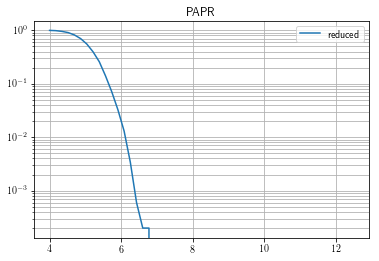

In [23]:
PAPRvaluesDB=np.linspace(4,12.5,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
uncodedPAPRccdf=np.zeros(len(PAPRvaluesDB))

#print(Pav)

for cTmp in range(len(PAPRvaluesDB)):
    reducedPAPRccdf[cTmp]=np.sum(reducedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    #uncodedPAPRccdf[cTmp]=np.sum(uncodedPAPR>(10**(PAPRvaluesDB[cTmp]/10)))



plt.figure()

#plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')
plt.semilogy(PAPRvaluesDB,(reducedPAPRccdf/len(reducedPAPR)),label='reduced')
plt.legend()
plt.title('PAPR')
plt.grid(which='both')
plt.show()



In [99]:
#np.savez('CEforPAPR_sameRandSign_N%d_16QAM_%d_Q%d_from%d_to%d_seed%d'%(N,symbolsNum,sampleLength,signEstiBegin,signEnd,mySeed),
#         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf)

np.savez('CEforPAPR_sameRandSign_N%d_16QAM_%d_Q%d_from%d_to%d'%(N,symbolsNum,sampleLength,signEstiBegin,signEnd),
         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf)

## A test on mean and variance

What I see from the following experiemnt on the mean and variance of the OFDM signal is that the decidedSigns multiplication doesn't make a difference compared to the symbols untouched version. For the mean, I see a roughly uniform distribution among 4 values for 16QAM which get closer to zero for higher N. I don't know why. Apart from the histograms, the mean over all OFDM symbols is quite close to zero. I can't prove that $\mathbb{E}[C_kX^\ast_k]=0$ but simulation shows that.

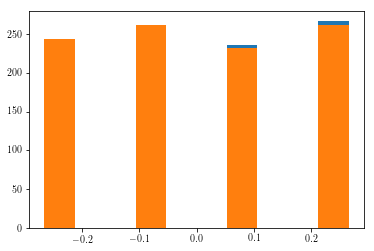

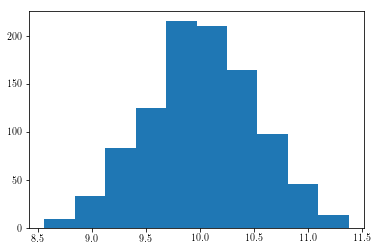

(0.004596194077712561+0.0021213203435596446j)


In [22]:
plt.figure()
plt.hist(np.real(meanValue))
plt.hist(np.imag(meanValue))

plt.show()

plt.figure()
plt.hist(varianceValue)
plt.show()

print(np.mean(meanValue))

## Seeds merger 

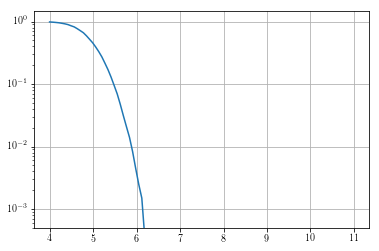

In [92]:
seedNumbers=[1,2,3]
PAPRvaluesDB=np.linspace(4,11,100)

savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
allReducedPAPR=np.array([])

for cSeed in seedNumbers:
    #dataFile='CEforPAPR_sameRandSign_N1024_16QAM_1000_Q100_from1_to1024_seed%d.npz'%(cSeed)
    dataFile='CEforPAPR_N64_16QAM_2000_Q10000_from1_to64_seed%d.npz'%(cSeed)
    saved=np.load(dataFile)
    savedPAPR=saved['reducedPAPR'];
    allReducedPAPR=np.append(allReducedPAPR,savedPAPR)
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=savedPAPRccdf[cTmp]+ np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))

np.savez('CEforPAPR_N64_16QAM_6000_Q10000_from1_to64',
     reducedPAPR=allReducedPAPR,reducedPAPRccdf=reducedPAPRccdf)

plt.figure()
plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(allReducedPAPR)))
plt.grid()
plt.ylim([0.0005,1.5])
plt.show()



## Calculations from McDiarmid ineq

In [28]:
tmpd=1/np.sqrt(10)*2*np.sqrt(18) #for 16QAM
tmpP=0.001
tmpN=1024
upperBound= np.log(tmpN)+0.5*np.log(np.log(tmpN))+0.5*np.log(np.pi/3)+0.57
tmpAlpha=0.04#upperBound/100
QfromAlpha=tmpd**2/(2*tmpAlpha**2)*np.log(2/tmpP) #taking (N-j/N)=1 at its largest
tmpQ=10000
AlphaFromQ=np.sqrt(tmpd**2/(2*tmpQ)*np.log(2/tmpP)) #taking (N-j/N)=1 at its largest
print(tmpAlpha)
print(tmpd)
print(QfromAlpha)
print(AlphaFromQ)

0.04
2.6832815729997477
17102.030533969686
0.05230989280657292


## Plots for Reliability of estimation and Q

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10


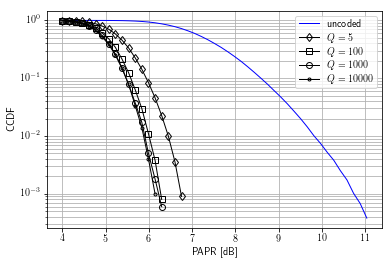

In [4]:
#Reliabity and Q, plots
PAPRvaluesDB=np.linspace(4,11.5,50)


withTitle=False

dataFiles=['N64_16QAM_50000_uncoded.npz',
           'CEforPAPR_sameRandSign_N64_16QAM_10000_Q5_from1_to64.npz',
           'CEforPAPR_N64_16QAM_5000_Q100_from1_to64.npz',
           'CEforPAPR_N64_16QAM_5000_Q1000_from1_to64.npz',
           'CEforPAPR_N64_16QAM_6000_Q10000_from1_to64.npz']

curveLabels=['uncoded',
             '$Q=5$',
             '$Q=100$',
             '$Q=1000$',
            '$Q=10000$']



filesStyle=[['blue','None'],
            ['black','d'],
            ['black','s'],
            ['black','o'],
            ['black','.']]

filesOrder=range(len(dataFiles))

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1,
                fillstyle='none')

plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('CEforPAPRforQ.pdf',format='pdf',bbox_inches='tight')
plt.show()





## Plots for refined alg

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


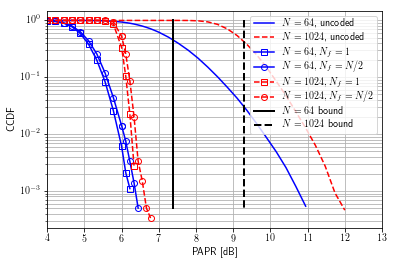

In [5]:
#Reliabity and Q, plots

PAPRvaluesDB=np.linspace(4,6,10)
PAPRvaluesDB=np.append(PAPRvaluesDB,np.linspace(6,7,10))
PAPRvaluesDB=np.append(PAPRvaluesDB,np.linspace(7,12,20))


withTitle=False

dataFiles=['N64_16QAM_50000_uncoded.npz',
           'N1024_16QAM_50000_uncoded.npz',
           'CEforPAPR_sameRandSign_N64_16QAM_10000_Q100_from1_to64.npz',
           'CEforPAPR_sameRandSign_N64_16QAM_10000_Q100_from32_to64.npz',
           'CEforPAPR_sameRandSign_N1024_16QAM_5000_Q100_from1_to1024.npz',
           'CEforPAPR_sameRandSign_N1024_16QAM_6000_Q100_from512_to1024.npz']

curveLabels=['$N=64$,  uncoded',
             '$N=1024$,  uncoded',
             '$N=64, N_f=1$' ,
             '$N=64, N_f=N/2$' ,
             '$N=1024, N_f=1$' ,
             '$N=1024, N_f=N/2$' ]


    
filesStyle=[['blue','None','-'],
            ['red','None','--'],
             ['blue','s','-'],
             ['blue','o','-'],
             ['red','s','--'],
             ['red','o','--']]


filesOrder=range(len(dataFiles))

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1.5,
                fillstyle='none',linestyle=filesStyle[cFile][2])
tmpN=64
upperBound= np.log(tmpN)+0.5*np.log(np.log(tmpN))+0.5*np.log(np.pi/3)+0.57
plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='$N=64$ bound',
            color='black',linewidth=2)
tmpN=1024
upperBound= np.log(tmpN)+0.5*np.log(np.log(tmpN))+0.5*np.log(np.pi/3)+0.57
plt.semilogy(10*np.log10(upperBound)*np.ones(2),np.array([1,0.0005]),label='$N=1024$ bound',
            color='black',linewidth=2,linestyle='--')


plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF')
plt.xlim([4,13])
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('CEforPAPRrefined.pdf',format='pdf',bbox_inches='tight')
plt.show()





## Plots for perf and comparison

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in log10


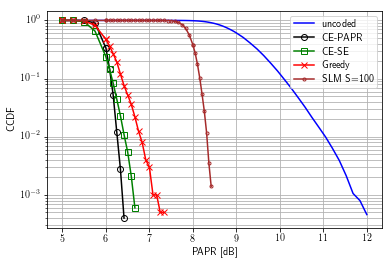

In [6]:
#perf and ocmparison
PAPRvaluesDB=np.array([5])#np.linspace(4,5,3)
PAPRvaluesDB=np.append(PAPRvaluesDB,np.linspace(5,6,5))
PAPRvaluesDB=np.append(PAPRvaluesDB,np.linspace(6,8,25))
PAPRvaluesDB=np.append(PAPRvaluesDB,np.linspace(8,9,20))
PAPRvaluesDB=np.append(PAPRvaluesDB,np.linspace(9,12,20))


withTitle=False

dataFiles=[#'N64_16QAM_50000_uncoded.npz',
           'N1024_16QAM_50000_uncoded.npz',
#           'CEforPAPR_sameRandSign_N64_16QAM_10000_Q100_from1_to64.npz',
           'CEforPAPR_sameRandSign_N1024_16QAM_5000_Q100_from1_to1024.npz',
           'LSE_N1024_16QAM_10000_1_1014_1024_f10_Q100.npz',
#           'SharifGreedyPlain_N64_16QAM_10000_from1_to64.npz',
           'SharifGreedyPlain_N1024_16QAM_2000_from1_to1024.npz',
            'SLM_N1024_16QAM_10000_S100.npz']
           

curveLabels=[#'$N=64$,  uncoded',
             '  uncoded',
#             '$N=64, (1,0)$' ,
             'CE-PAPR',
             'CE-SE',
#            'N=64, Greedy',
            'Greedy',
            'SLM S=100']


    
filesStyle=[#['blue','None','-'],
            ['blue','None','-'],
            #['blue','o','-'],
            ['black','o','-'],
             ['green','s','-'],
           #['blue','x','-'],
           ['red','x','-'],
            ['brown','.','-']]
 

#dataFiles=['N64_16QAM_50000_uncoded.npz',
#           'N1024_16QAM_50000_uncoded.npz',
           #'CEforPAPR_sameRandSign_N64_16QAM_10000_Q100_from1_to64.npz',
#           'CEforPAPR_sameRandSign_N1024_16QAM_5000_Q100_from1_to1024.npz',
           #'LSE_N64_16QAM_10000_1_54_64_f10_Q100.npz',
#           'LSE_N1024_16QAM_10000_1_1014_1024_f10_Q100.npz',
#           'SharifGreedyPlain_N64_16QAM_10000_from1_to64.npz',
#           'SharifGreedyPlain_N1024_16QAM_2000_from1_to1024.npz',
#          'SLM_N64_16QAM_10000_S100.npz',
#          'SLM_N1024_16QAM_10000_S100.npz',]
           

#curveLabels=['$N=64$,  uncoded',
#             ' $N=1024$ uncoded',
###             '$N=64, CE-PAPR$' ,
  #           '$N=1024$ CE-PAPR',
#             '$N=64$ CE-LSE $N_e=10$ ',
#             '$N=1024$ CE-LSE $N_e=10$ ',
##            '$N=64$, Greedy Alg.',
 #           '$N=1024$, Greedy Alg.',
 #           '$N=64$ SLM $S=100$',
 #           '$N=1024$ SLM $S=100$']


    
#filesStyle=[['blue','None','--'],
#            ['green','None','-'],
#            ['blue','o','--'],
#            ['green','o','-'],
#            ['blue','s','--'],
#             ['green','s','-'],
#           ['blue','x','-'],
#           ['green','x','-'],
#            ['blue','.','--'],
#            ['green','.','-']]



filesOrder=range(len(dataFiles))

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1.5,
                fillstyle='none',linestyle=filesStyle[cFile][2])

plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('CEforPAPRcomp.pdf',format='pdf',bbox_inches='tight')
plt.show()





# Log-Sum-Exp metric

## Verification

This verifies that log-sum-exp is a good approximation for PAPR.

HBox(children=(IntProgress(value=0, description='over symbols', max=5000), HTML(value='')))

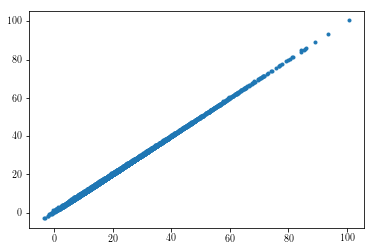

MSE=0.067038


In [91]:
#verification of the log-sum-exp metric being an approximation

N=128
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

symbolsNum=5000


logSumExp=np.zeros(symbolsNum)
logSumExp1=np.zeros(symbolsNum)
PAPR=np.zeros(symbolsNum)
PAPR1=np.zeros(symbolsNum)

PAPRvaluesDB=np.linspace(4,12.5,50)

PAPRccdf=np.zeros(len(PAPRvaluesDB))
logSumExpccdf=np.zeros(len(PAPRvaluesDB))

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
   
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbols=symbols[:,0]
    
    signal=ifft(symbols,n=L*N)*L*np.sqrt(N)
    
    logSumExp[cSym]= np.log(np.sum(np.exp(np.absolute(signal)**2))) #much more accuare when Pav is outside!
    logSumExp1[cSym]= (np.sum(np.exp(np.absolute(signal)**2/Pav)))
    
    PAPR[cSym]=np.max(np.absolute(signal)**2)
    PAPR1[cSym]=np.exp(np.max(np.absolute(signal)**2)/Pav)
    

plt.figure()
plt.plot(PAPR,logSumExp,'.')
#plt.plot(logSumExp)
#plt.xlim([0,100000])
#plt.ylim([-1,1e10])
plt.show()
print('MSE=%f'%np.mean(np.absolute(PAPR-logSumExp)**2))
    
    
for cTmp in range(len(PAPRvaluesDB)):
    PAPRccdf[cTmp]=np.sum(PAPR>10**(PAPRvaluesDB[cTmp]/10))
    logSumExpccdf[cTmp]=np.sum(logSumExp>(10**(PAPRvaluesDB[cTmp]/10)))
    
plt.figure()
plt.semilogy(PAPRvaluesDB,(PAPRccdf/len(PAPR)),label='PAPR')
plt.semilogy(PAPRvaluesDB,(logSumExpccdf/len(PAPR)),label='logSumExp')
plt.legend()
plt.show()



## main run

In [13]:
#log-sum-exp testing

N=1024
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

sampleLength=100 #for estimation

symbolsNum=10000

signTheoBegin=1 #counting from 1
signEstiBegin=N-10
signEnd=N

reducedMetric=np.zeros((symbolsNum,1))
reducedPAPR=np.zeros((symbolsNum,1))

initialMetric=np.zeros((symbolsNum,1))

tmpSigns=[]

LSEfactor=1/10

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbolsMat=np.tile(symbols,(1,sampleLength))
    
    decidedSigns=np.ones((N,1))
    
    estimatedMetricMinus=np.zeros((N,1))
    estimatedMetricPlus=np.zeros((N,1))
    evalMetricMinus=np.zeros((N,1))
    evalMetricPlus=np.zeros((N,1))
    
    sampleSigns=randint(0,2,(N,sampleLength))*2-1
    #sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
    #sampleMetrics= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
    #initialMetric[cSym]= 1/sampleLength * np.sum(sampleMetrics)
    
    
    for cSign in range(signTheoBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):

        #by estimation
        if cSign>=signEstiBegin:
            sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
            sampleSigns[cSign,:]=1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

            sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            #sampleMetrics= np.log(np.sum(np.exp(np.absolute(sampleSignals)),0))
            sampleMetrics= np.sum(np.exp(LSEfactor*np.absolute(sampleSignals)**2),0)
            estimatedMetricPlus[cSign]= (1/sampleLength * np.sum(sampleMetrics))

            sampleSigns[cSign,:]=-1
            sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
            sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
            #sampleMetrics= np.log(np.sum(np.exp(np.absolute(sampleSignalsM)),0))
            sampleMetrics= (np.sum(np.exp(LSEfactor*np.absolute(sampleSignalsM)**2),0))
            estimatedMetricMinus[cSign]= (1/sampleLength * np.sum(sampleMetrics))

            #print('estimated plus:%f, estimated minus %f'%
            #      (estimatedMetricMinus[cSign], estimatedMetricPlus[cSign]))

            if -estimatedMetricMinus[cSign] + estimatedMetricPlus[cSign]>0:
                decidedSigns[cSign]=-1
        else:   

            #plus sign

            tmpSigns=np.append(decidedSigns[:cSign],1)

            meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L

            #plus sign
            varFactor=(N-cSign)/N*Pav/2 #this is sigma^2
            beta=LSEfactor*varFactor*(1-2*LSEfactor*varFactor)**(-1) 

            m=beta*np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value

            M=np.exp(m);
            evalMetricPlus[cSign]=(np.sum(M))

            #minus sign
            tmpSigns=np.append(decidedSigns[:cSign],-1)

            meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L

            m=beta*np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
            #M=varFactor**3*(m**3 + 18*m**2 + 72*m + 48)
            M=np.exp(m);
            evalMetricMinus[cSign]=(np.sum(M))

            if evalMetricMinus[cSign]< evalMetricPlus[cSign]:
                decidedSigns[cSign]=-1

    #reducedMetric[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**6)
    reducedPAPR[cSym]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)/Pav
    

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars


### uncoded PAPR

In [14]:
#uncoded CM and PAPR
symbolsNum=50000
#N=2048*2
#L=4
#modulationOrder=16
#uncodedCM=np.zeros(symbolsNum)
uncodedPAPR=np.zeros(symbolsNum)

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)



for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    #print(symbols.shape)
    #print(np.var(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N)))
    tmpSigOFDM=np.absolute(ifft(symbols,n=L*N,axis=0)*L*np.sqrt(N))
#    uncodedCM[cSym]=1/L/N*np.sum(tmpSigOFDM**6)
    uncodedPAPR[cSym]=np.max(tmpSigOFDM**2)/Pav
    
    
    

HBox(children=(IntProgress(value=0, description='over symbols', max=50000), HTML(value='')))

### CCDF curves

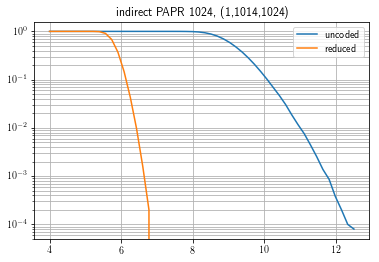

In [15]:

PAPRvaluesDB=np.linspace(4,12.5,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
uncodedPAPRccdf=np.zeros(len(PAPRvaluesDB))

#print(Pav)

for cTmp in range(len(PAPRvaluesDB)):
    reducedPAPRccdf[cTmp]=np.sum(reducedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    uncodedPAPRccdf[cTmp]=np.sum(uncodedPAPR>(10**(PAPRvaluesDB[cTmp]/10)))



plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D



#sTmp=reducedPAPRccdf/len(reducedPAPR)<=0.001
#s1Tmp=np.nonzero(sTmp)[0][0]
#sTmp=uncodedPAPRccdf/len(uncodedPAPR)<=0.001
#s3Tmp=np.nonzero(sTmp)[0][0]
#print('1e-3 point, reducedPAPR=',PAPRvaluesDB[s1Tmp])
#print('1e-3 point, uncodedPAPR=',PAPRvaluesDB[s3Tmp])
    
    

plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')
plt.semilogy(PAPRvaluesDB,(reducedPAPRccdf/len(reducedPAPR)),label='reduced')
plt.legend()
plt.title('indirect PAPR %d, (%d,%d,%d)'%(N,signTheoBegin,signEstiBegin,signEnd))
plt.grid(which='both')
plt.show()







### Saving data

In [16]:
#make sure you comment the save, just in case the cell is run accidentally
#np.savez('N4096_16QAM_50000_uncoded',reducedCM=uncodedCM, reducedCMccdf=uncodedCMccdf,
#        reducedPAPR=uncodedPAPR,reducedPAPRccdf=uncodedPAPRccdf)

#np.savez('N128_16QAM_50000_uncoded',reducedPAPR=uncodedPAPR,reducedPAPRccdf=uncodedPAPRccdf)

np.savez('N%d_16QAM_%d_%d_%d_%d_f%d_Q%d'%(N,len(reducedPAPR),signTheoBegin,signEstiBegin,signEnd,1/LSEfactor,sampleLength),
         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf)


### for reporting

In [13]:
##### Reliabity and Q, plots
PAPRvaluesDB=np.linspace(5,12,35)


withTitle=False

dataFiles=['N64_16QAM_50000_uncoded.npz',
           'N1024_16QAM_50000_uncoded.npz',
           'LSE_N64_16QAM_10000_1_54_64_f10_Q100.npz',
           'LSE_N64_16QAM_10000_32_54_64_f10_Q100.npz',
#           'LSE_N64_16QAM_10000_48_54_64_f10_Q100.npz',
           'LSE_N1024_16QAM_10000_1_1014_1024_f10_Q100.npz',
           'LSE_N1024_16QAM_10000_512_1014_1024_f10_Q100.npz']
 #          'LSE_N1024_16QAM_10000_768_1014_1024_f10_Q100.npz']

curveLabels=['$N=64$,  uncoded',
             '$N=1024$,  uncoded',
             '$N=64, N_f=1$' ,
             '$N=64, N_f=N/2$' ,
             '$N=1024, N_f=1$' ,
             '$N=1024, N_f=N/2$' ]


    
filesStyle=[['blue','None','-'],
            ['red','None','--'],
             ['blue','s','-'],
             ['blue','o','-'],
             ['red','s','--'],
             ['red','o','--']]
           
           
filesOrder=range(len(dataFiles))

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1.5,
                fillstyle='none',linestyle=filesStyle[cFile][2])

plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('Corresponding "induced" PAPR reduction')
plt.savefig('LSEreduction.pdf',format='pdf',bbox_inches='tight')
plt.show()




/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


## Scaling Factor test

implements $\sum \mathbb{E} e^{\alpha |s(n)|^2}$ for estimation and $\beta \sum e^{\beta \lambda_n}$ with $\beta=\alpha\sigma_s^2(1-2\alpha\sigma^2)^{-1}$ in analytic part

In [3]:
#tests the effect of scaling the signal smaller for a given N and various factors

N=64
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

sampleLength=100 #for estimation

symbolsNum=10000

signTheoBegin=1 #counting from 1
signEstiBegin=N-10
signEnd=N

factors=1/np.array([2,5,10,50])

reducedMetric=np.zeros((symbolsNum,1))
reducedPAPR=np.zeros((symbolsNum,factors.shape[0]))

initialMetric=np.zeros((symbolsNum,1))

tmpSigns=[]


for cFactor in tqdm_notebook(range(factors.shape[0]), desc='over factors'):
    for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols', leave=False):
    
    
        symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
        symbolsMat=np.tile(symbols,(1,sampleLength))

        decidedSigns=np.ones((N,1))

        estimatedMetricMinus=np.zeros((N,1))
        estimatedMetricPlus=np.zeros((N,1))
        evalMetricMinus=np.zeros((N,1))
        evalMetricPlus=np.zeros((N,1))

        sampleSigns=randint(0,2,(N,sampleLength))*2-1
        #sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
        #sampleMetrics= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
        #initialMetric[cSym]= 1/sampleLength * np.sum(sampleMetrics)


        for cSign in range(signTheoBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):

            #by estimation
            if cSign>=signEstiBegin:
                sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
                sampleSigns[cSign,:]=1
                sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

                sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
                #sampleMetrics= np.log(np.sum(np.exp(np.absolute(sampleSignals)),0))
                sampleMetrics= np.sum(np.exp(factors[cFactor]*np.absolute(sampleSignals)**2),0)
                estimatedMetricPlus[cSign]= (1/sampleLength * np.sum(sampleMetrics))

                sampleSigns[cSign,:]=-1
                sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
                sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
                #sampleMetrics= np.log(np.sum(np.exp(np.absolute(sampleSignalsM)),0))
                sampleMetrics= (np.sum(np.exp(factors[cFactor]*np.absolute(sampleSignalsM)**2),0))
                estimatedMetricMinus[cSign]= (1/sampleLength * np.sum(sampleMetrics))

                #print('estimated plus:%f, estimated minus %f'%
                #      (estimatedMetricMinus[cSign], estimatedMetricPlus[cSign]))

                if -estimatedMetricMinus[cSign] + estimatedMetricPlus[cSign]>0:
                    decidedSigns[cSign]=-1
            else:   

                #plus sign

                tmpSigns=np.append(decidedSigns[:cSign],1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L

                #plus sign
                varFactor=(N-cSign)/N*Pav/2 #this is sigma^2
                beta=factors[cFactor]*varFactor*(1-2*factors[cFactor]*varFactor)**(-1) 
                
                m=beta*np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
                
                M=np.exp(m);
                evalMetricPlus[cSign]=(np.sum(M))

                #minus sign
                tmpSigns=np.append(decidedSigns[:cSign],-1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L

                m=beta*np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
                #M=varFactor**3*(m**3 + 18*m**2 + 72*m + 48)
                M=np.exp(m);
                evalMetricMinus[cSign]=(np.sum(M))

                if evalMetricMinus[cSign]< evalMetricPlus[cSign]:
                    decidedSigns[cSign]=-1

        #reducedMetric[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**6)
        reducedPAPR[cSym,cFactor]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)/Pav



HBox(children=(IntProgress(value=0, description='over factors', max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in double_scalars


HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

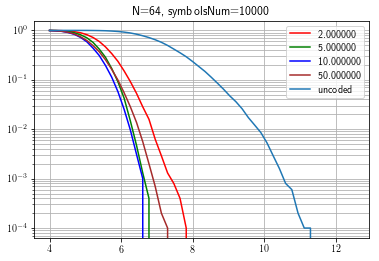

In [9]:
PAPRvaluesDB=np.linspace(4,12.5,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
uncodedPAPRccdf=np.zeros(len(PAPRvaluesDB))

lineStyle=[['red','None'],
             ['green','None'],
             ['blue','None'],
             ['brown','None'],
             ['purple','None'],
             ['cyan','None'],
             ['black','None'],
             ['yellow','None']]



plt.figure()

for cFactor in range(factors.shape[0]):
    for cTmp in range(len(PAPRvaluesDB)):
        reducedPAPRccdf[cTmp]=np.sum(reducedPAPR[:,cFactor]>10**(PAPRvaluesDB[cTmp]/10))
    plt.semilogy(PAPRvaluesDB,reducedPAPRccdf/len(reducedPAPR[:,cFactor]),
                 label='%f'%(1/factors[cFactor]),
                color=lineStyle[cFactor][0])


for cTmp in range(len(PAPRvaluesDB)):
    uncodedPAPRccdf[cTmp]=np.sum(uncodedPAPR>(10**(PAPRvaluesDB[cTmp]/10)))




plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')

plt.legend()
plt.grid(which='both')
plt.title('N=%d, symbolsNum=%d'%(N,symbolsNum))
#plt.xlim([6.8,8])
#plt.ylim([0.004,0.03])
plt.savefig('LSE_factors_N%d_N-%d_Q%d_updated.pdf'%(N,N-signEstiBegin,sampleLength),
            format='pdf')
plt.show()



## estimated signs - Q balance

In [78]:
#for each given Q we ex[ect to have d ifferent number of last signs which need estimation. 
#this will be seen by the point where performance does not get better by adding more to 
#the srtimated signs, i.e., where closed form expression become more accurate.

N=64
L=4
modulationOrder=16

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

sampleLength=10000 #for estimation

symbolsNum=10000

signTheoBegin=1 #counting from 1
signEstiBegin=np.array([N,N-5,N-10,N-20])
signEnd=N

factors=10

reducedMetric=np.zeros((symbolsNum,1))
reducedPAPR=np.zeros((symbolsNum,signEstiBegin.shape[0]))

initialMetric=np.zeros((symbolsNum,1))

tmpSigns=[]


for cEstiSign in tqdm_notebook(range(signEstiBegin.shape[0]), desc='over signEstiBegin'):
    for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols', leave=False):
    
    
        symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
        symbolsMat=np.tile(symbols,(1,sampleLength))

        decidedSigns=np.ones((N,1))

        estimatedMetricMinus=np.zeros((N,1))
        estimatedMetricPlus=np.zeros((N,1))
        evalMetricMinus=np.zeros((N,1))
        evalMetricPlus=np.zeros((N,1))

        sampleSigns=randint(0,2,(N,sampleLength))*2-1
        #sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
        #sampleMetrics= 1/L/N * np.sum(np.absolute(sampleSignals)**6,0)
        #initialMetric[cSym]= 1/sampleLength * np.sum(sampleMetrics)


        for cSign in range(signTheoBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):

            #by estimation
            if cSign>=signEstiBegin[cEstiSign]:
                sampleSigns[:cSign,:]=np.tile(decidedSigns[:cSign],(1,sampleLength))
                sampleSigns[cSign,:]=1
                sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1

                sampleSignals=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
                #sampleMetrics= np.log(np.sum(np.exp(np.absolute(sampleSignals)),0))
                sampleMetrics= np.sum(np.exp(factors*np.absolute(sampleSignals)**2),0)
                estimatedMetricPlus[cSign]= (1/sampleLength * np.sum(sampleMetrics))

                sampleSigns[cSign,:]=-1
                sampleSigns[cSign+1:,:]=randint(0,2,(N-cSign-1,sampleLength))*2-1
                sampleSignalsM=ifft(symbolsMat*sampleSigns,n=L*N,axis=0)*L*np.sqrt(N)
                #sampleMetrics= np.log(np.sum(np.exp(np.absolute(sampleSignalsM)),0))
                sampleMetrics= (np.sum(np.exp(factors*np.absolute(sampleSignalsM)**2),0))
                estimatedMetricMinus[cSign]= (1/sampleLength * np.sum(sampleMetrics))

                #print('estimated plus:%f, estimated minus %f'%
                #      (estimatedMetricMinus[cSign], estimatedMetricPlus[cSign]))

                if -estimatedMetricMinus[cSign] + estimatedMetricPlus[cSign]>0:
                    decidedSigns[cSign]=-1
            else:   

                #plus sign

                tmpSigns=np.append(decidedSigns[:cSign],1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L

                #plus sign
                varFactor=(N-cSign)/N*Pav/2 #this is sigma^2
                beta=factors*varFactor*(1-2*factors*varFactor)**(-1) 
                
                m=beta*np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
                
                M=np.exp(m);
                evalMetricPlus[cSign]=(np.sum(M))

                #minus sign
                tmpSigns=np.append(decidedSigns[:cSign],-1)

                meanVector=ifft(tmpSigns*symbols[:cSign+1,0],n=L*N,axis=0)*np.sqrt(N)*L

                m=beta*np.absolute(varFactor**(-0.5) * meanVector)**2 #noncentrality parameter is sum of squared of every mean value
                #M=varFactor**3*(m**3 + 18*m**2 + 72*m + 48)
                M=np.exp(m);
                evalMetricMinus[cSign]=(np.sum(M))

                if evalMetricMinus[cSign]< evalMetricPlus[cSign]:
                    decidedSigns[cSign]=-1

        #reducedMetric[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**6)
        reducedPAPR[cSym,cEstiSign]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)*L*np.sqrt(N))**2)/Pav




HBox(children=(IntProgress(value=0, description='over signEstiBegin', max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: overflow encountered in exp
/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: RuntimeWarning: overflow encountered in exp
/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in exp


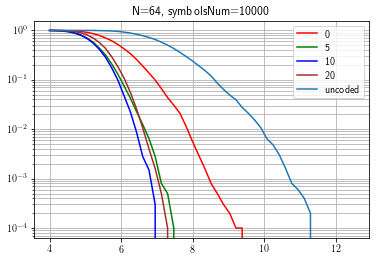

In [79]:
PAPRvaluesDB=np.linspace(4,12.5,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
uncodedPAPRccdf=np.zeros(len(PAPRvaluesDB))

lineStyle=[['red','None'],
             ['green','None'],
             ['blue','None'],
             ['brown','None'],
             ['purple','None'],
             ['cyan','None'],
             ['black','None'],
             ['yellow','None']]



plt.figure()

for cSignEsti in range(signEstiBegin.shape[0]):
    for cTmp in range(len(PAPRvaluesDB)):
        reducedPAPRccdf[cTmp]=np.sum(reducedPAPR[:,cSignEsti]>10**(PAPRvaluesDB[cTmp]/10))
    plt.semilogy(PAPRvaluesDB,reducedPAPRccdf/symbolsNum,
                 label='%d'%(N-signEstiBegin[cSignEsti]),
                color=lineStyle[cSignEsti][0])


for cTmp in range(len(PAPRvaluesDB)):
    uncodedPAPRccdf[cTmp]=np.sum(uncodedPAPR>(10**(PAPRvaluesDB[cTmp]/10)))




plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')

plt.legend()
plt.grid(which='both')
plt.title('N=%d, symbolsNum=%d'%(N,symbolsNum))
#plt.xlim([6.3,8])
#plt.ylim([0.004,0.03])
plt.savefig('LSE_QKeBalance_Q10000.pdf',format='pdf')
plt.show()





### for report

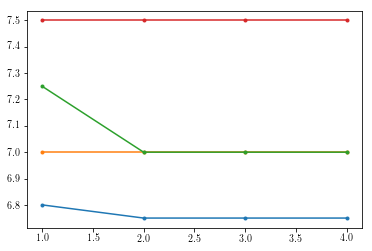

In [93]:
#rounded values
plt.figure()
plt.plot([1,2,3,4],[6.8,6.75,6.75,6.75],'.-')
plt.plot([1,2,3,4],[7,7,7,7],'.-')
plt.plot([1,2,3,4],[7.25,7,7,7],'.-')
plt.plot([1,2,3,4],np.array([8.5,8.5,8.5,8.5])-1,'.-')

plt.show()

# SLM 

SLM is included in this notebook because we want to see how "a randomized algorithm" behaves. We'll test effect of number of phase vectors on performance and see if we allocate enough resources, do we get the same eprformance? BUT WHAT IS RANDOMIZED? :D

Anyways, it can be a good comparison. Theoretical SLM seems to be matching at leats for N=1024. I can see that if I take the sam eocmplexity of $2QN^2 \log N$ the CE method is still doing better. This value for 1024 is in order of $10^9$, very large.

But I guess it's better to use some normal S value!

In [5]:
#SLM method
N=64;

modulationOrder=16;

L=4;

symbolsNum=10000

S=100; #number of sequences or IFFTs

# p=randi(2,S,Nsubc)*2-3;
# p=exp(1i*rand(S,Nsubc)*2*pi);
#t=np.array([1,-1]);
#p=t[randint(0,np.len(t),(S,Nsubc))];
p=randint(0,2,(N,S))*2-1
# p=exp(1i*(rand(S,Nsubc)*pi/2+pi/3));



symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))
Pav=np.mean(np.absolute(constPoints)**2)

reducedPAPR=np.zeros(symbolsNum)
reducedSRCM=np.zeros(symbolsNum)
for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))
    symbolsMat=np.tile(symbols,(1,S))
    
    candidateSignals=ifft(symbolsMat*p,n=L*N,axis=0)*L*np.sqrt(N)
    reducedPAPR[cSym]=np.min(np.max(np.absolute(candidateSignals)**2,axis=0))/Pav
    reducedSRCM[cSym]=1/L/N*np.min(np.sum(np.absolute(candidateSignals)**6,axis=0))
    
    
    
PAPRvaluesDB=np.linspace(4,12.5,50)
CMvaluesDB=np.linspace(4,12.5,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
reducedSRCMccdf=np.zeros(len(CMvaluesDB))
#uncodedPAPRccdf=np.zeros(len(PAPRvaluesDB))

for cTmp in range(len(PAPRvaluesDB)):
    reducedPAPRccdf[cTmp]=np.sum(reducedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    #uncodedPAPRccdf[cTmp]=np.sum(uncodedPAPR>(10**(PAPRvaluesDB[cTmp]/10)))

for cTmp in range(len(CMvaluesDB)):
    reducedSRCMccdf[cTmp]=np.sum(reducedSRCM/Pav**3>10**(CMvaluesDB[cTmp]/10))



plt.figure()
plt.semilogy(PAPRvaluesDB,(reducedPAPRccdf/len(reducedPAPR)),label='reduced')
plt.legend()
plt.title('PAPR')
plt.grid(which='both')
plt.show()

plt.figure()
plt.semilogy(CMvaluesDB,(reducedSRCMccdf/len(reducedSRCM)),label='reduced')
plt.legend()
plt.title('SRCM')
plt.grid(which='both')
plt.show()





HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

In [6]:
np.savez('SLM_N%d_%dQAM_%d_S%d'%(N,modulationOrder,symbolsNum,S),
         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf,
        reducedCM=reducedSRCM,reducedCMccdf=reducedSRCMccdf)



## Curves plotting

/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10


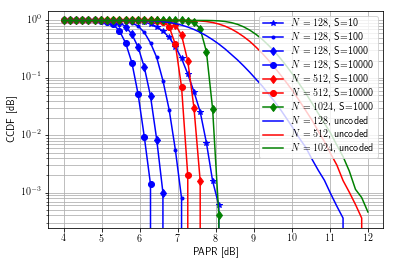

In [2]:
#curves of SLM method
PAPRvaluesDB=np.linspace(4,12,50)

withTitle=False


dataFiles=['SLM_N128_16QAM_5000_S10.npz',
           'SLM_N128_16QAM_5000_S100.npz',
           'SLM_N128_16QAM_5000_S1000.npz',
           'SLM_N128_16QAM_5000_S10000.npz',
           'SLM_N512_16QAM_5000_S1000.npz',
           'SLM_N512_16QAM_5000_S10000.npz',
           'SLM_N1024_16QAM_5000_S1000.npz',
           'N128_16QAM_50000_uncoded.npz',
           'N512_16QAM_50000_uncoded.npz',
           'N1024_16QAM_50000_uncoded.npz']

filesOrder=range(len(dataFiles))
curveLabels=['$N=128$, S=10$',
             '$N=128$, S=100$',
             '$N=128$, S=1000$',
             '$N=128$, S=10000$',
             '$N=512$, S=1000$',
             '$N=512$, S=10000$',
             '$N=1024$, S=1000$',
            '$N=128$, uncoded',
            '$N=512$, uncoded',
            '$N=1024$, uncoded']



filesStyle=[['blue','*'],
             ['blue','.'],
             ['blue','d'],
             ['blue','o'],
             ['red','d'],
             ['red','o'],
             ['green','d'],
             ['blue','None'],
             ['red','None'],
             ['green','None']]



#in case you have to calculate ccdf for a case you haven't saved it :D
plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=0
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1])

plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
if withTitle:
    plt.title('PAPR in SLM')
plt.savefig('PAPR SLM.pdf',format='pdf')
plt.show()





## Theoretical SLM

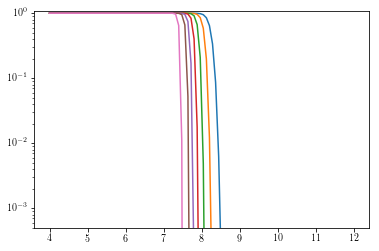

In [131]:
#Theoretical SLM
PAPRvaluesDB=np.linspace(4,12,100)

theoreticSLM=np.zeros(len(PAPRvaluesDB))

N=1024
S=[1000,10000,100000,1000000,10000000,100000000,np.floor(N**2*np.log2(N)*100*2)]

plt.figure()
for cS in S:
    theoreticSLM=(1-(1-np.exp(-10**(PAPRvaluesDB/10)))**(2.8*N))**cS
    plt.semilogy(PAPRvaluesDB,theoreticSLM)

plt.ylim([0.0005,1.1])
plt.show()


# Variance convergence test

## Over $\tau$

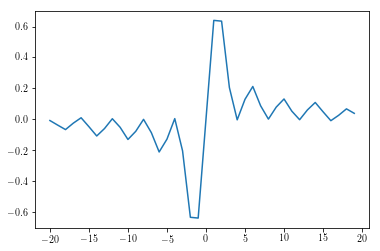

-0.014407386770675795
0.25126
[-0.63465689 -0.63958132  0.63958132  0.63465689]
[-5.92924792e-17]


In [53]:
N=50000
L=4
symbols,constPoints=generateSymbol('QAM',16,(N,1))
#tau=np.arange(0,N-1+N-1+1,100)-(N-1)
tau=np.arange(-20,20,1)
#tau=np.array([2])
#print(tau)
s=np.zeros(tau.size)
s1=np.zeros(tau.size)

k=np.arange(N)
k1=(np.absolute(symbols[:,0])==np.absolute(1+1j))
symbols=symbols[:,0]
for c in range(tau.size):
    s[c]=1/np.sum(k1)*np.sum(np.sin(2*np.pi/(L*N)*k[k1]*tau[c]))
    #s1[c]=1/np.sum(k1)*np.sum(np.sin(2*np.pi/L/N*k[k1]*tau[c]+2*np.angle(symbols[k1])))
    s1[c]=1/np.sum(k1)*np.sum(np.cos((2*np.pi/L/N)*k[k1]*tau[c]+2*np.angle(symbols[k1])))
    

plt.figure()
plt.plot(tau,s)
#plt.xlim(0,100)


plt.show()

print(1/np.sum(k1)*np.sum(np.sin(2*np.angle(symbols[k1]))))

#print(np.sum(np.sin(np.angle(constPoints))))
#print(k1)
#print(k[k1])
#print(symbols[k1])

print(np.sum(k1)/N)

print(s[np.absolute(s)>0.4])

print(s1[np.absolute(tau)<1])


In [50]:
k[k1].shape

(2510,)

## Over $N$ For one $\tau$ 

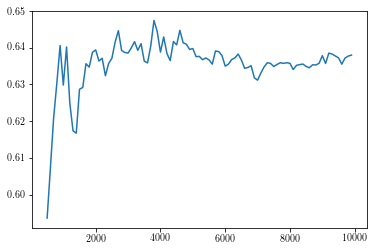

0.6379723446705167


In [10]:
N=np.arange(500,10000,100)
k1=randint(4,size=N[-1])

L=4
tau=2
s=np.zeros(N.size)
s1=np.zeros(N.size)
for c in range(N.size):
    k11=k1[:N[c]]
    k111=np.arange(N[c])
   
    #s[c]=1/np.sum(k11==10)*np.sum(np.sin(2*np.pi/N[c]/L*np.arange(0,N[c],5)*tau))
    s1[c]=1/np.sum(k11==2)*np.sum(np.sin(2*np.pi/N[c]/L*k111[k11==2]*tau))
    
plt.figure()
#plt.plot(N,s)
plt.plot(N,s1)
plt.show()

#print(s[-1])
print(s1[-1])



## sinc thing

Sanity check for $\lim_{N\to\infty} \frac{1}{N} \sum_{k=0}^{N-1} \cos(\frac{2\pi}{N} k \tau)=\mathrm{sinc}(2\tau)$, though there was also this $T_c$ in the Convergence thingy paper.

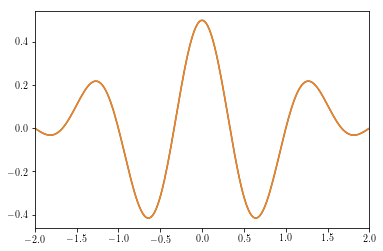

In [16]:
N=1000
L=4

tau=np.linspace(-10,10,1000)
#tau=np.arange(0,N-1+N-1+1,100)-(N-1)
#tau=np.arange(-20,20,1)
#tau=np.array([2])
#print(tau)
s=np.zeros(tau.size)
s1=np.zeros(tau.size)
s2=np.zeros(tau.size)
j=500
k=np.arange(j,N)

for c in range(tau.size):
    s[c]=1/N*np.sum(np.cos(2*np.pi/(N)*k*tau[c]))
    s1[c]=1/N*np.sum(np.sin(2*np.pi/(N)*k*tau[c]))
    s2[c]=np.sum(np.sin(2*np.pi*k*tau[c]))
    

plt.figure()
plt.plot(tau,s)
#plt.plot(tau,s1)
plt.plot(tau,np.sinc(2*tau)-j/N*np.sinc(2*tau*j/N))
#plt.plot(tau,1/2/np.pi/tau- np.cos(2*np.pi*tau)/2/np.pi/tau)
#plt.plot(tau,1/2/np.pi/tau*(np.cos(2*np.pi*tau*j/N)- np.cos(2*np.pi*tau))) #for a growing j


plt.xlim([-2,2])
plt.show()



# Greedy algorithm of Sharif 

## Plain

from "Peak Power Reduction of OFDM Signals with Sign Adjustment" Masoud Sharif, Vahid Tarokh, and Babak Hassibi

matches the paper for N=128

In [47]:
#needs generateSymbol, otherwise no dependancy on previous cells
mySeed=1
np.random.seed(mySeed)

N=1024
L=4
modulationOrder=16

algNorm=6

symbols,constPoints=generateSymbol('QAM',modulationOrder,(1,1))

Pav=np.mean(np.absolute(constPoints)**2)

symbolsNum=10000

signBegin=1 #counting from 1
signEnd=N

reducedPAPR=np.zeros((symbolsNum,1))
reducedCM=np.zeros((symbolsNum,1))


tmpSigns=[]

for cSym in tqdm_notebook(range(symbolsNum), desc='over symbols'):
    
    symbols,constPoints=generateSymbol('QAM',modulationOrder,(N,1))

    decidedSigns=np.ones((N,1))
    
    for cSign in range(signBegin-1,signEnd):#tqdm_notebook(range(signTheoBegin-1,signEnd),desc='over signs'):


        sig=ifft(symbols[:cSign+1,0]*decidedSigns[:cSign+1,0],n=L*N)*L*np.sqrt(N)
        
        #the algorithm works on real and imag parts separated
        plusValue=np.sum(np.real(sig)**algNorm+np.imag(sig)**algNorm)
        #np.sum(np.absolute(sig)**algNorm)
        
        decidedSigns[cSign]=-1
        
        sig=ifft(symbols[:cSign+1,0]*decidedSigns[:cSign+1,0],n=L*N)*L*np.sqrt(N)
        
        minusValue=np.sum(np.real(sig)**algNorm+np.imag(sig)**algNorm)
        #np.sum(np.absolute(sig)**algNorm)
        
        if plusValue < minusValue:
            decidedSigns[cSign]=1


    reducedPAPR[cSym]=np.max(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)
                                         *L*np.sqrt(N))**2)/Pav
    reducedCM[cSym]=1/L/N*np.sum(np.absolute(ifft(symbols*decidedSigns,n=L*N,axis=0)
                                             *L*np.sqrt(N))**6)
    

HBox(children=(IntProgress(value=0, description='over symbols', max=10000), HTML(value='')))

KeyboardInterrupt: 

### CCDF

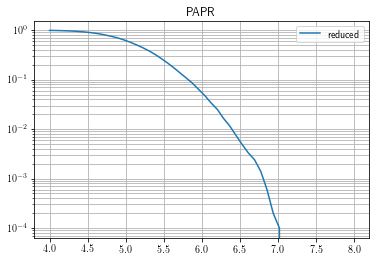

In [46]:
PAPRvaluesDB=np.linspace(4,8,50)
CMvaluesDB=np.linspace(4,12,50)

reducedPAPRccdf=np.zeros(len(PAPRvaluesDB))
reducedCMccdf=np.zeros(len(CMvaluesDB))


#print(Pav)

for cTmp in range(len(PAPRvaluesDB)):
    reducedPAPRccdf[cTmp]=np.sum(reducedPAPR>10**(PAPRvaluesDB[cTmp]/10))

for cTmp in range(len(CMvaluesDB)):
    reducedCMccdf[cTmp]=np.sum(reducedCM/Pav**3>10**(CMvaluesDB[cTmp]/10))



plt.figure()

#plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')
plt.semilogy(PAPRvaluesDB,(reducedPAPRccdf/len(reducedPAPR)),label='reduced')
plt.legend()
plt.title('PAPR')
plt.grid(which='both')

plt.show()

plt.figure()

#plt.semilogy(PAPRvaluesDB,(uncodedPAPRccdf/len(uncodedPAPR)),label='uncoded')
plt.semilogy(CMvaluesDB,(reducedCMccdf/len(reducedCM)),label='reduced')
plt.legend()
plt.title('CM')
plt.grid(which='both')

plt.show()



###  save data

In [115]:
np.savez('SharifGreedyPlain_N%d_16QAM_%d_from%d_to%d'%(N,symbolsNum,signBegin,signEnd),
         reducedPAPR=reducedPAPR,reducedPAPRccdf=reducedPAPRccdf)

### plots

In [118]:
#Reliabity and Q, plots
PAPRvaluesDB=np.linspace(4,11.5,50)


withTitle=False

dataFiles=['SharifGreedyPlain_N64_16QAM_10000_from1_to64.npz',
           'SharifGreedyPlain_N128_16QAM_10000_from1_to128.npz',
           'SharifGreedyPlain_N1024_16QAM_2000_from1_to1024.npz']

curveLabels=['N=64, 10000',
            'N=128, 10000',
            'N=1024, 2000']



filesStyle=[['blue','None'],
            ['blue','s'],
            ['blue','d'],
            ['blue','*'],
            ['blue','o']]

filesOrder=range(len(dataFiles))

plt.figure()

#in case you have to calculate ccdf for a case you haven't saved it :D
for cFile in filesOrder:
    savedPAPRccdf=np.zeros(len(PAPRvaluesDB))
    saved=np.load(dataFiles[cFile])
    savedPAPR=saved['reducedPAPR'];
    for cTmp in range(len(PAPRvaluesDB)):
        savedPAPRccdf[cTmp]=np.sum(savedPAPR>10**(PAPRvaluesDB[cTmp]/10))
    savedPAPRccdf[10*np.log10(savedPAPRccdf/len(savedPAPR))<-35]=np.inf
    plt.semilogy(PAPRvaluesDB,(savedPAPRccdf/len(savedPAPR)),label=curveLabels[cFile],
                color=filesStyle[cFile][0],marker=filesStyle[cFile][1],linewidth=1)

plt.grid(which='both')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend(loc=1)
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF [dB]')
plt.xlim([4,11])
plt.show()


/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10


##  Pruned I

It simply does redo the algorith ofr $2^m$ permutations of $m$ initial signs and chooses the smallest. Shows improvement of course but not tempted to test it.

##  Pruned II

I just don't understand this one :D

# DFT-S-OFDM

In [5]:
# PAPR and CM of DFT-S-OFDM

N=256
L=4

Nuser=64

modulationOrder=16

localized=False;

Nsyms=10000;

dataSyms,constPoints=generateSymbol('QAM',modulationOrder,(Nuser,Nsyms))

DFTsyms=fft(dataSyms,n=Nuser,axis=0)/np.sqrt(Nuser)

#subcarrier mapping

mappedSubc=np.zeros((N,Nsyms))
startSubcIndex=0 #localized mode

if localized:
    mappedSubc[startSubcIndex:startSubcIndex+Nuser,:]=DFTsyms
else: #interleaved
    q=int(np.floor(N/Nuser)) #spacing

    mappedSubc[:N:q,]=DFTsyms


ifftInput=np.zeros((N*L,Nsyms))
ifftInput[:int(N/2),]=mappedSubc[:int(N/2),]
ifftInput[-int(N/2):,]=mappedSubc[-int(N/2):,]
#ifftInput=mappedSubc

ifftOut=ifft(ifftInput,n=N*L,axis=0)#*L*np.sqrt(N)



pwr=np.absolute(ifftOut)**2
papr=np.max(pwr,axis=0)/np.mean(pwr,axis=0)
RCM=np.mean(pwr**3)/np.mean(pwr)**3
CM=(10*np.log10(RCM)-1.52)/1.56+0.77
pwrLvL=np.arange(1,12,0.1)
ccdfPAPR=np.zeros(len(pwrLvL))

for k in range(len(pwrLvL)):
    ccdfPAPR[k]=np.sum(papr>=10**(pwrLvL[k]/10))

print(CM)

plt.figure()
plt.semilogy(pwrLvL,ccdfPAPR/Nsyms)
plt.grid(which='both')

plt.show()




/Users/safrasiabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


3.7860119235878367


# My intermediate mode

In [16]:
N=64
initialSymbolsNum=100
minSymbolsNum=5


signTheoBegin=1 #counting from 1
signEstiBegin=1
signEnd=15

symbolsNumStep=(initialSymbolsNum-minSymbolsNum)/(signEnd-signEstiBegin)
symbolsNumList=np.arange(initialSymbolsNum,minSymbolsNum,-symbolsNumStep)
print(symbolsNumList)
print(symbolsNumList.shape)


print(np.int(np.floor(np.linspace(100,5,64))))

[100.          93.21428571  86.42857143  79.64285714  72.85714286
  66.07142857  59.28571429  52.5         45.71428571  38.92857143
  32.14285714  25.35714286  18.57142857  11.78571429]
(14,)


TypeError: only size-1 arrays can be converted to Python scalars